In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import datetime 
#so we'll not get a new window for plots. everything will be in jupyter notebook
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 100,60
rcParams.update({'font.size': 30})


In [2]:
srt_date = '30 January' + ' 2020'
intdate = datetime.datetime.strptime(srt_date, '%d %B %Y').strftime('%Y-%m-%d')
intdate

'2020-01-30'

In [3]:
colls_list = ['date','totalconfirmed']
dataset = pd.read_csv("/home/vineeth/JupyterProjects/Covid-19/nation_level_daily.csv", usecols=colls_list)
dataset.date = dataset.date + '2020'

dataset.head()

date  totalconfirmed
0   30 January 2020               1
1   31 January 2020               1
2  01 February 2020               1
3  02 February 2020               2
4  03 February 2020               3

In [4]:
dataset['date'] = dataset['date'].apply(lambda x: datetime.datetime.strptime(x,'%d %B %Y'))
dataset['date'] = dataset['date'].apply(lambda x: datetime.datetime.strftime(x,'%Y-%m-%d'))
indexedDataset = dataset.set_index(['date'])

In [5]:

indexedDataset.drop(indexedDataset.index[0],inplace=True)
display(indexedDataset)


totalconfirmed
date                      
2020-01-31               1
2020-02-01               1
2020-02-02               2
2020-02-03               3
2020-02-04               3
...                    ...
2020-06-03          216876
2020-06-04          226723
2020-06-05          236195
2020-06-06          246603
2020-06-07          257486

[129 rows x 1 columns]

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text yticklabel objects>)

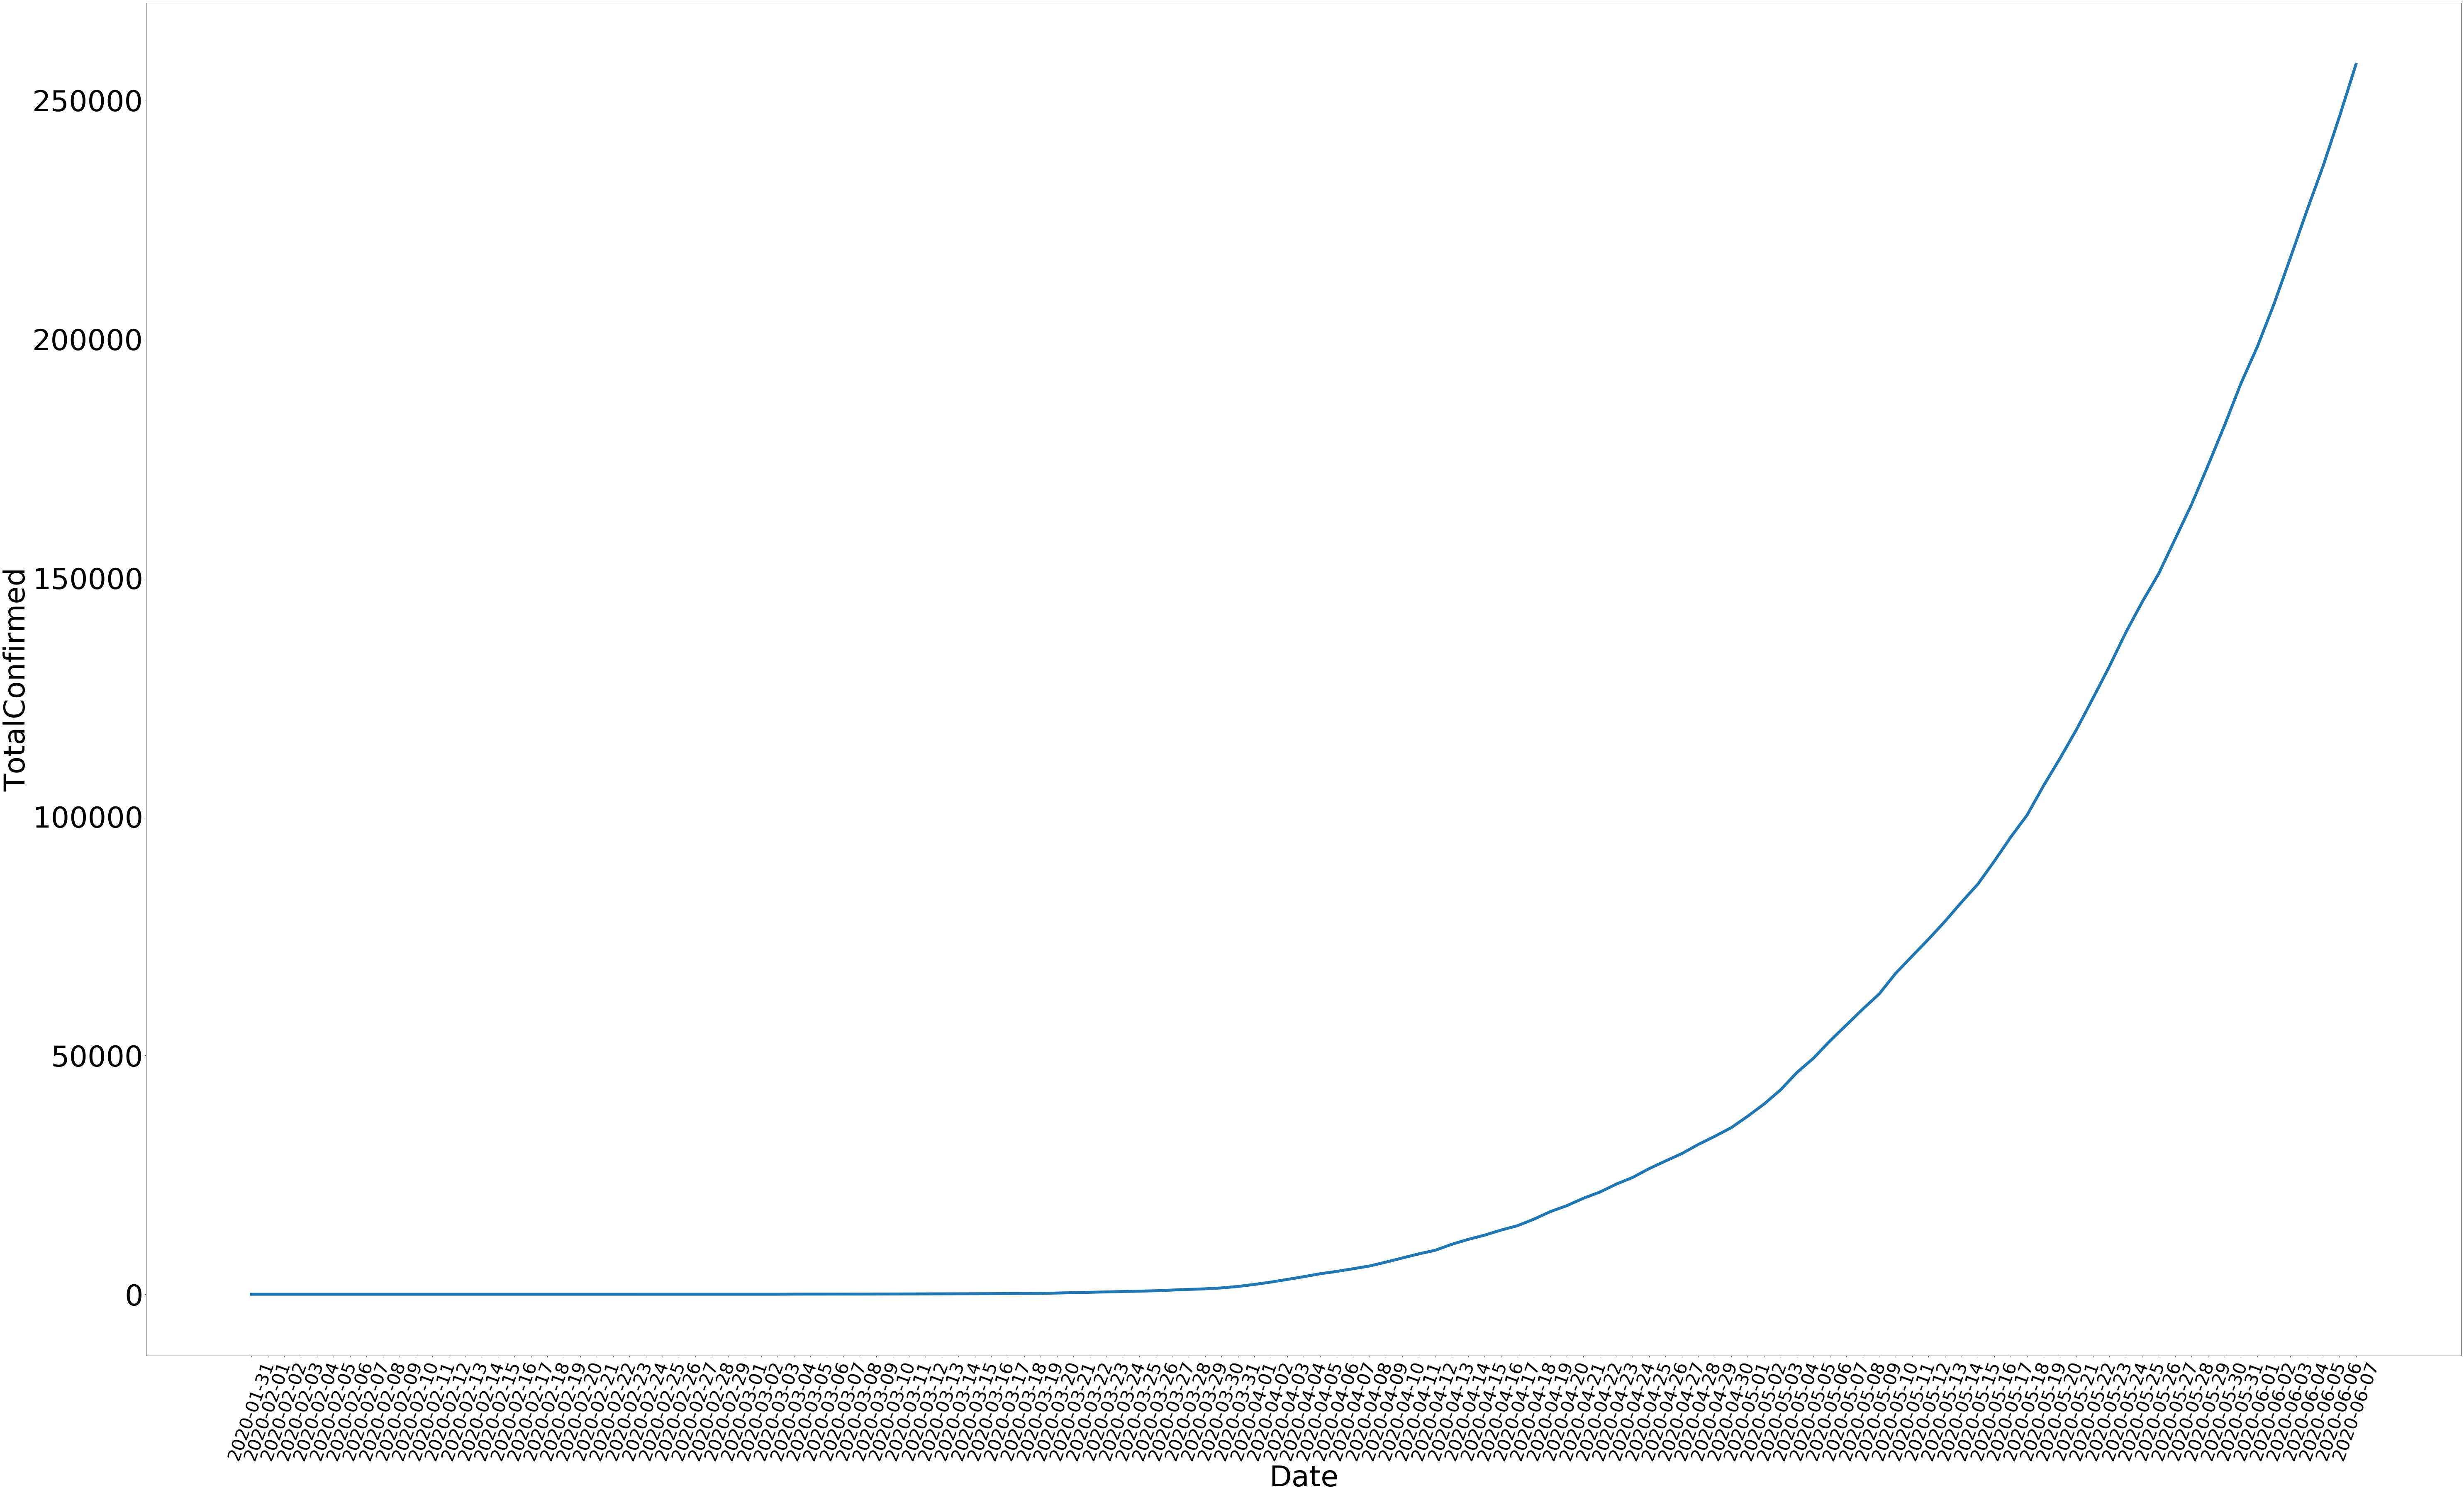

In [6]:
plt.xlabel("Date",fontsize=70)
plt.ylabel("TotalConfirmed",fontsize=70)
plt.plot(indexedDataset,linewidth=7)
# plt.legend(fontsize=70)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)

In [7]:
#now check the stationarity
#we see that the data is not stationary, i.e., mean is not constant

#Determing rolling stats - 1st variety of test to check stationarity
rolmean = indexedDataset.rolling(window=13).mean()
rolstd  = indexedDataset.rolling(window=13).std()

print(rolmean,rolstd)

            totalconfirmed
date                      
2020-01-31             NaN
2020-02-01             NaN
2020-02-02             NaN
2020-02-03             NaN
2020-02-04             NaN
...                    ...
2020-06-03   167879.307692
2020-06-04   175722.692308
2020-06-05   183782.000000
2020-06-06   192094.769231
2020-06-07   200751.307692

[129 rows x 1 columns]             totalconfirmed
date                      
2020-01-31             NaN
2020-02-01             NaN
2020-02-02             NaN
2020-02-03             NaN
2020-02-04             NaN
...                    ...
2020-06-03    29703.686571
2020-06-04    30810.150209
2020-06-05    31939.171877
2020-06-06    33219.432940
2020-06-07    34546.687283

[129 rows x 1 columns]


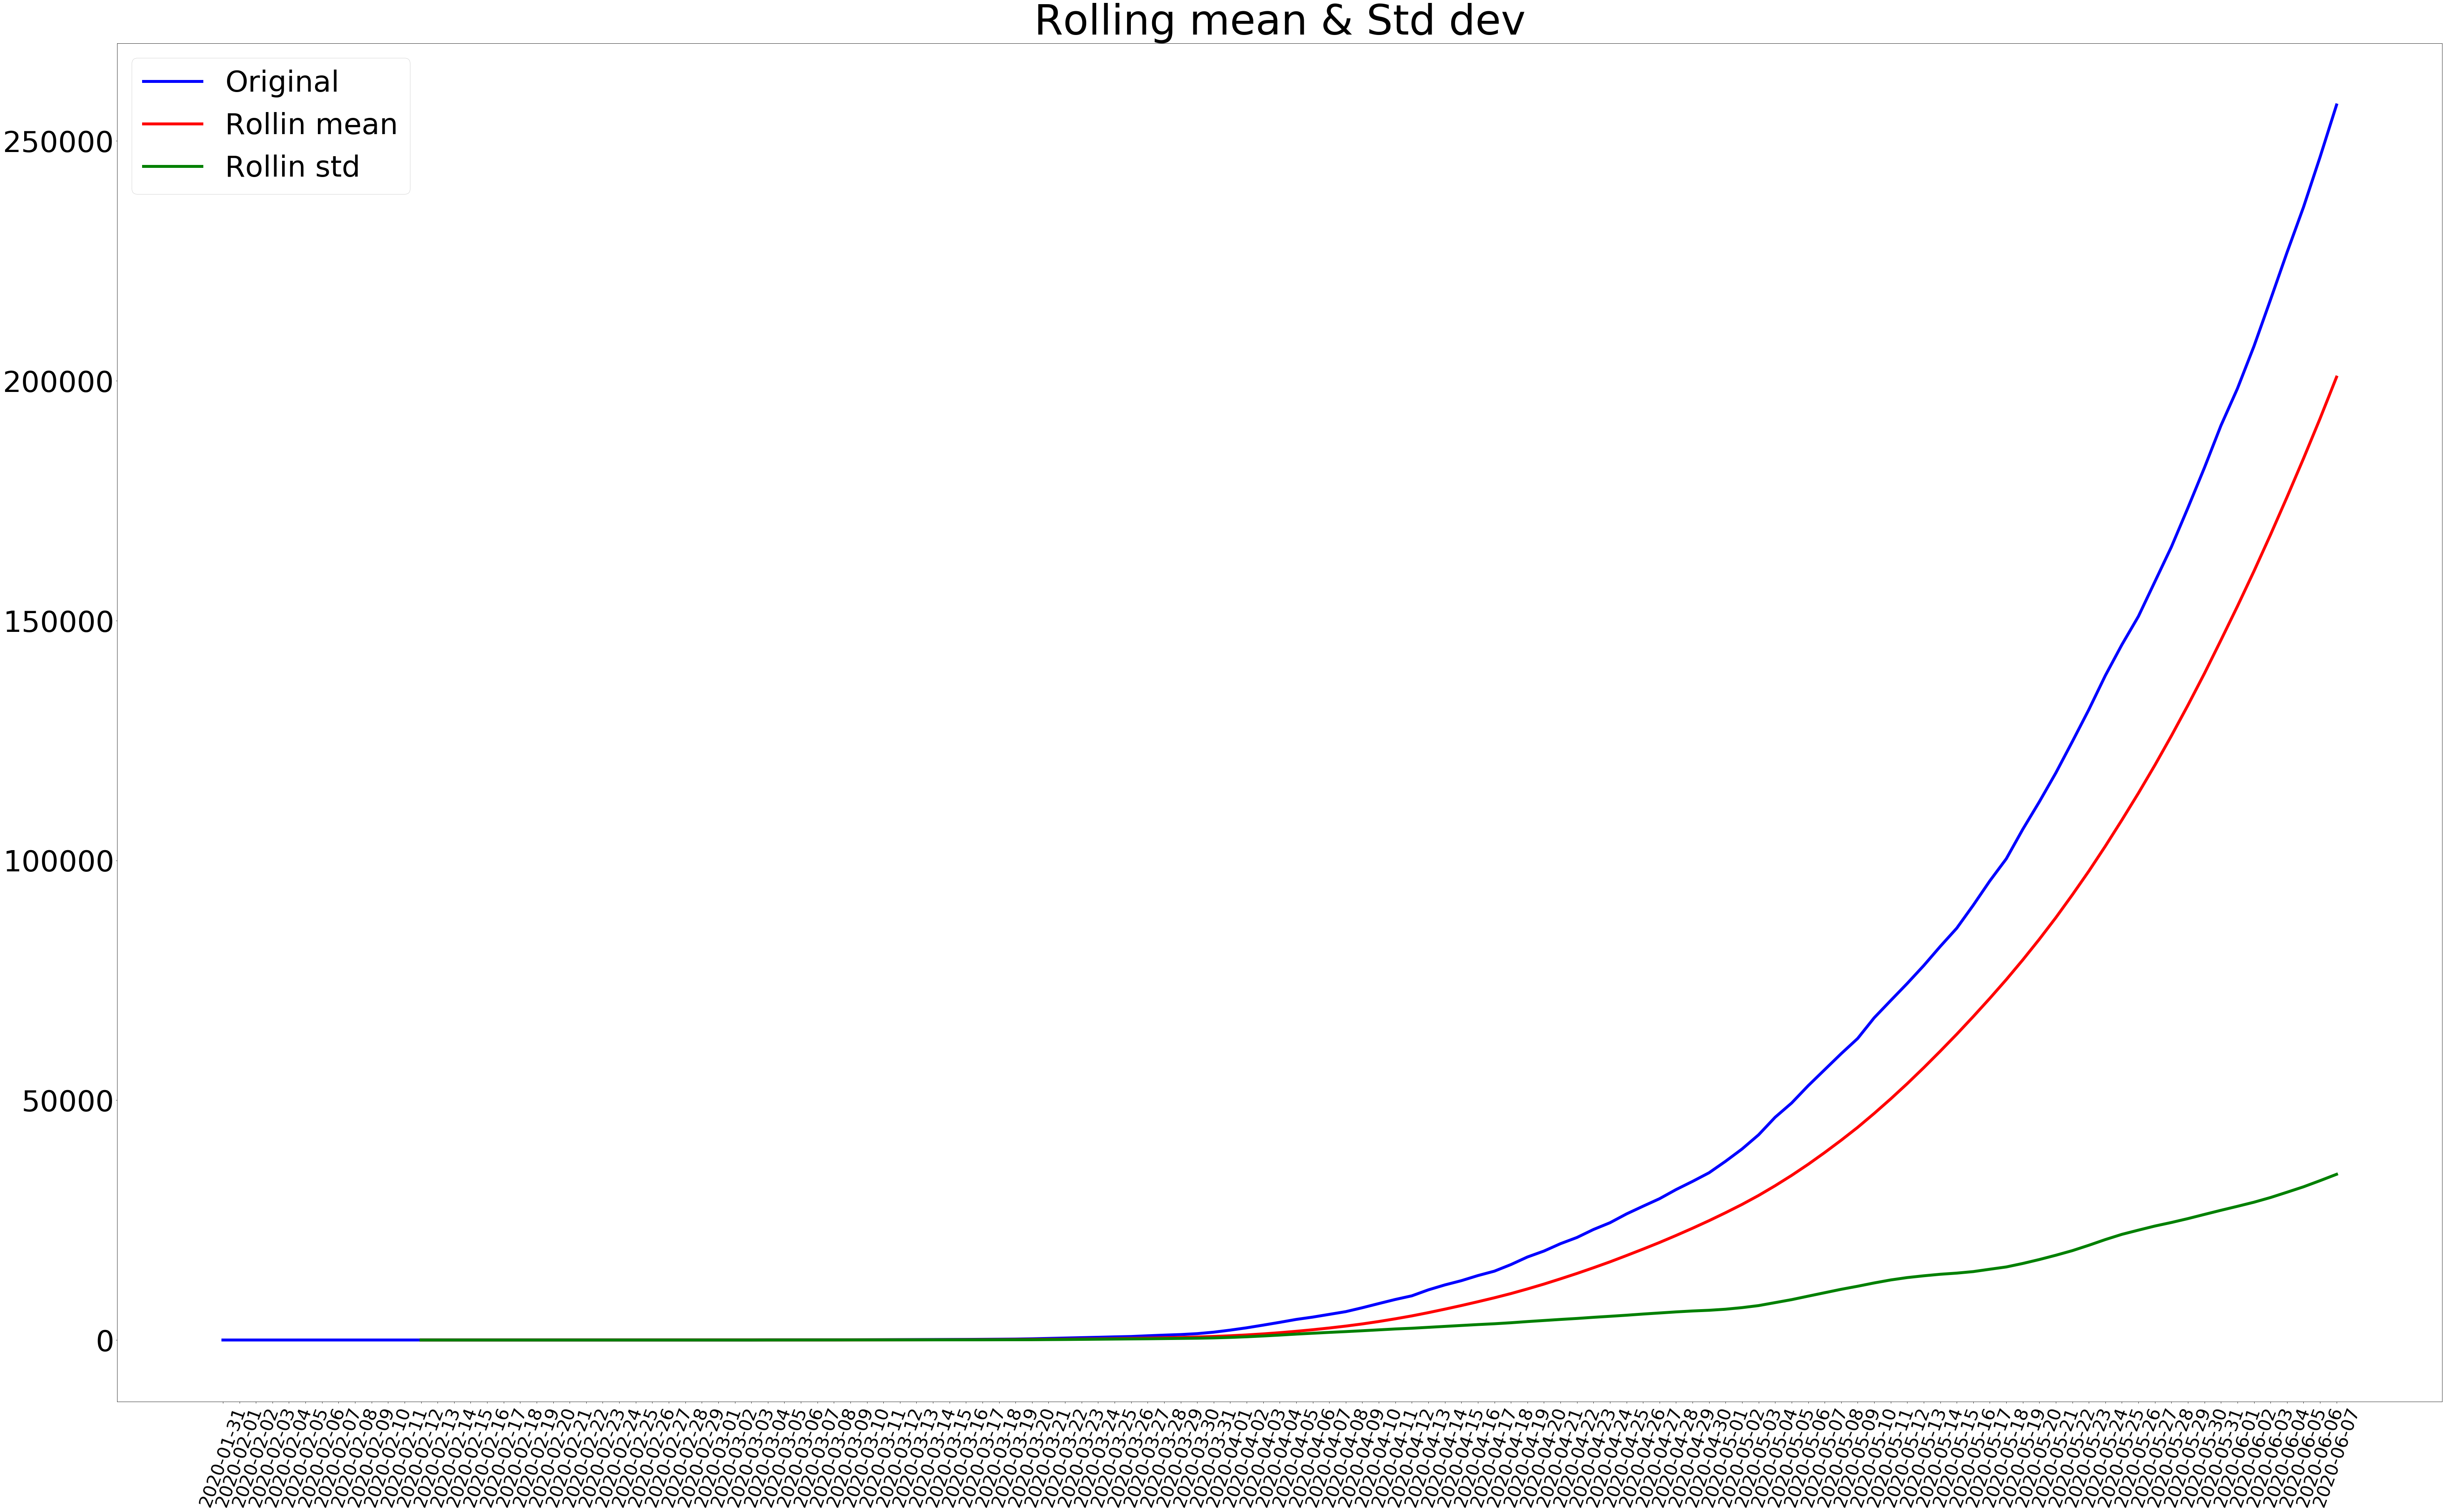

In [8]:
#now plot rolling stats

# indexedDataset['Date'] = mdates.date2num(indexedDataset.Date.dt.to_pydatetime())

orig = plt.plot(indexedDataset,linewidth=7, color='blue', label='Original')
mean = plt.plot(rolmean,linewidth=7,color='red', label='Rollin mean' )
std = plt.plot(rolstd,linewidth=7, color='g', label='Rollin std' )
plt.legend(loc='best')
plt.title('Rolling mean & Std dev',fontsize=100)
plt.legend(fontsize=70)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)
plt.show()
#mean and std dev are not stationary

In [9]:
#Perform Dickey-fuller test as well
from statsmodels.tsa.stattools import adfuller

#AIC gives exact values and actual values and gives comparison values btwn them
#we have a huge p values, generally it should be 0.5 or less
#Also critical value should be more than the test statistic
#Data is NOT stationary
print('Result of Dickey fuller test:')
dftest = adfuller(indexedDataset['totalconfirmed'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','no of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value

print(dfoutput)

Result of Dickey fuller test:
Test Statistic               0.683860
p-value                      0.989510
#lags used                   6.000000
no of observations used    122.000000
Critical value (1%)         -3.485122
Critical value (5%)         -2.885538
Critical value (10%)        -2.579569
dtype: float64


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text yticklabel objects>)

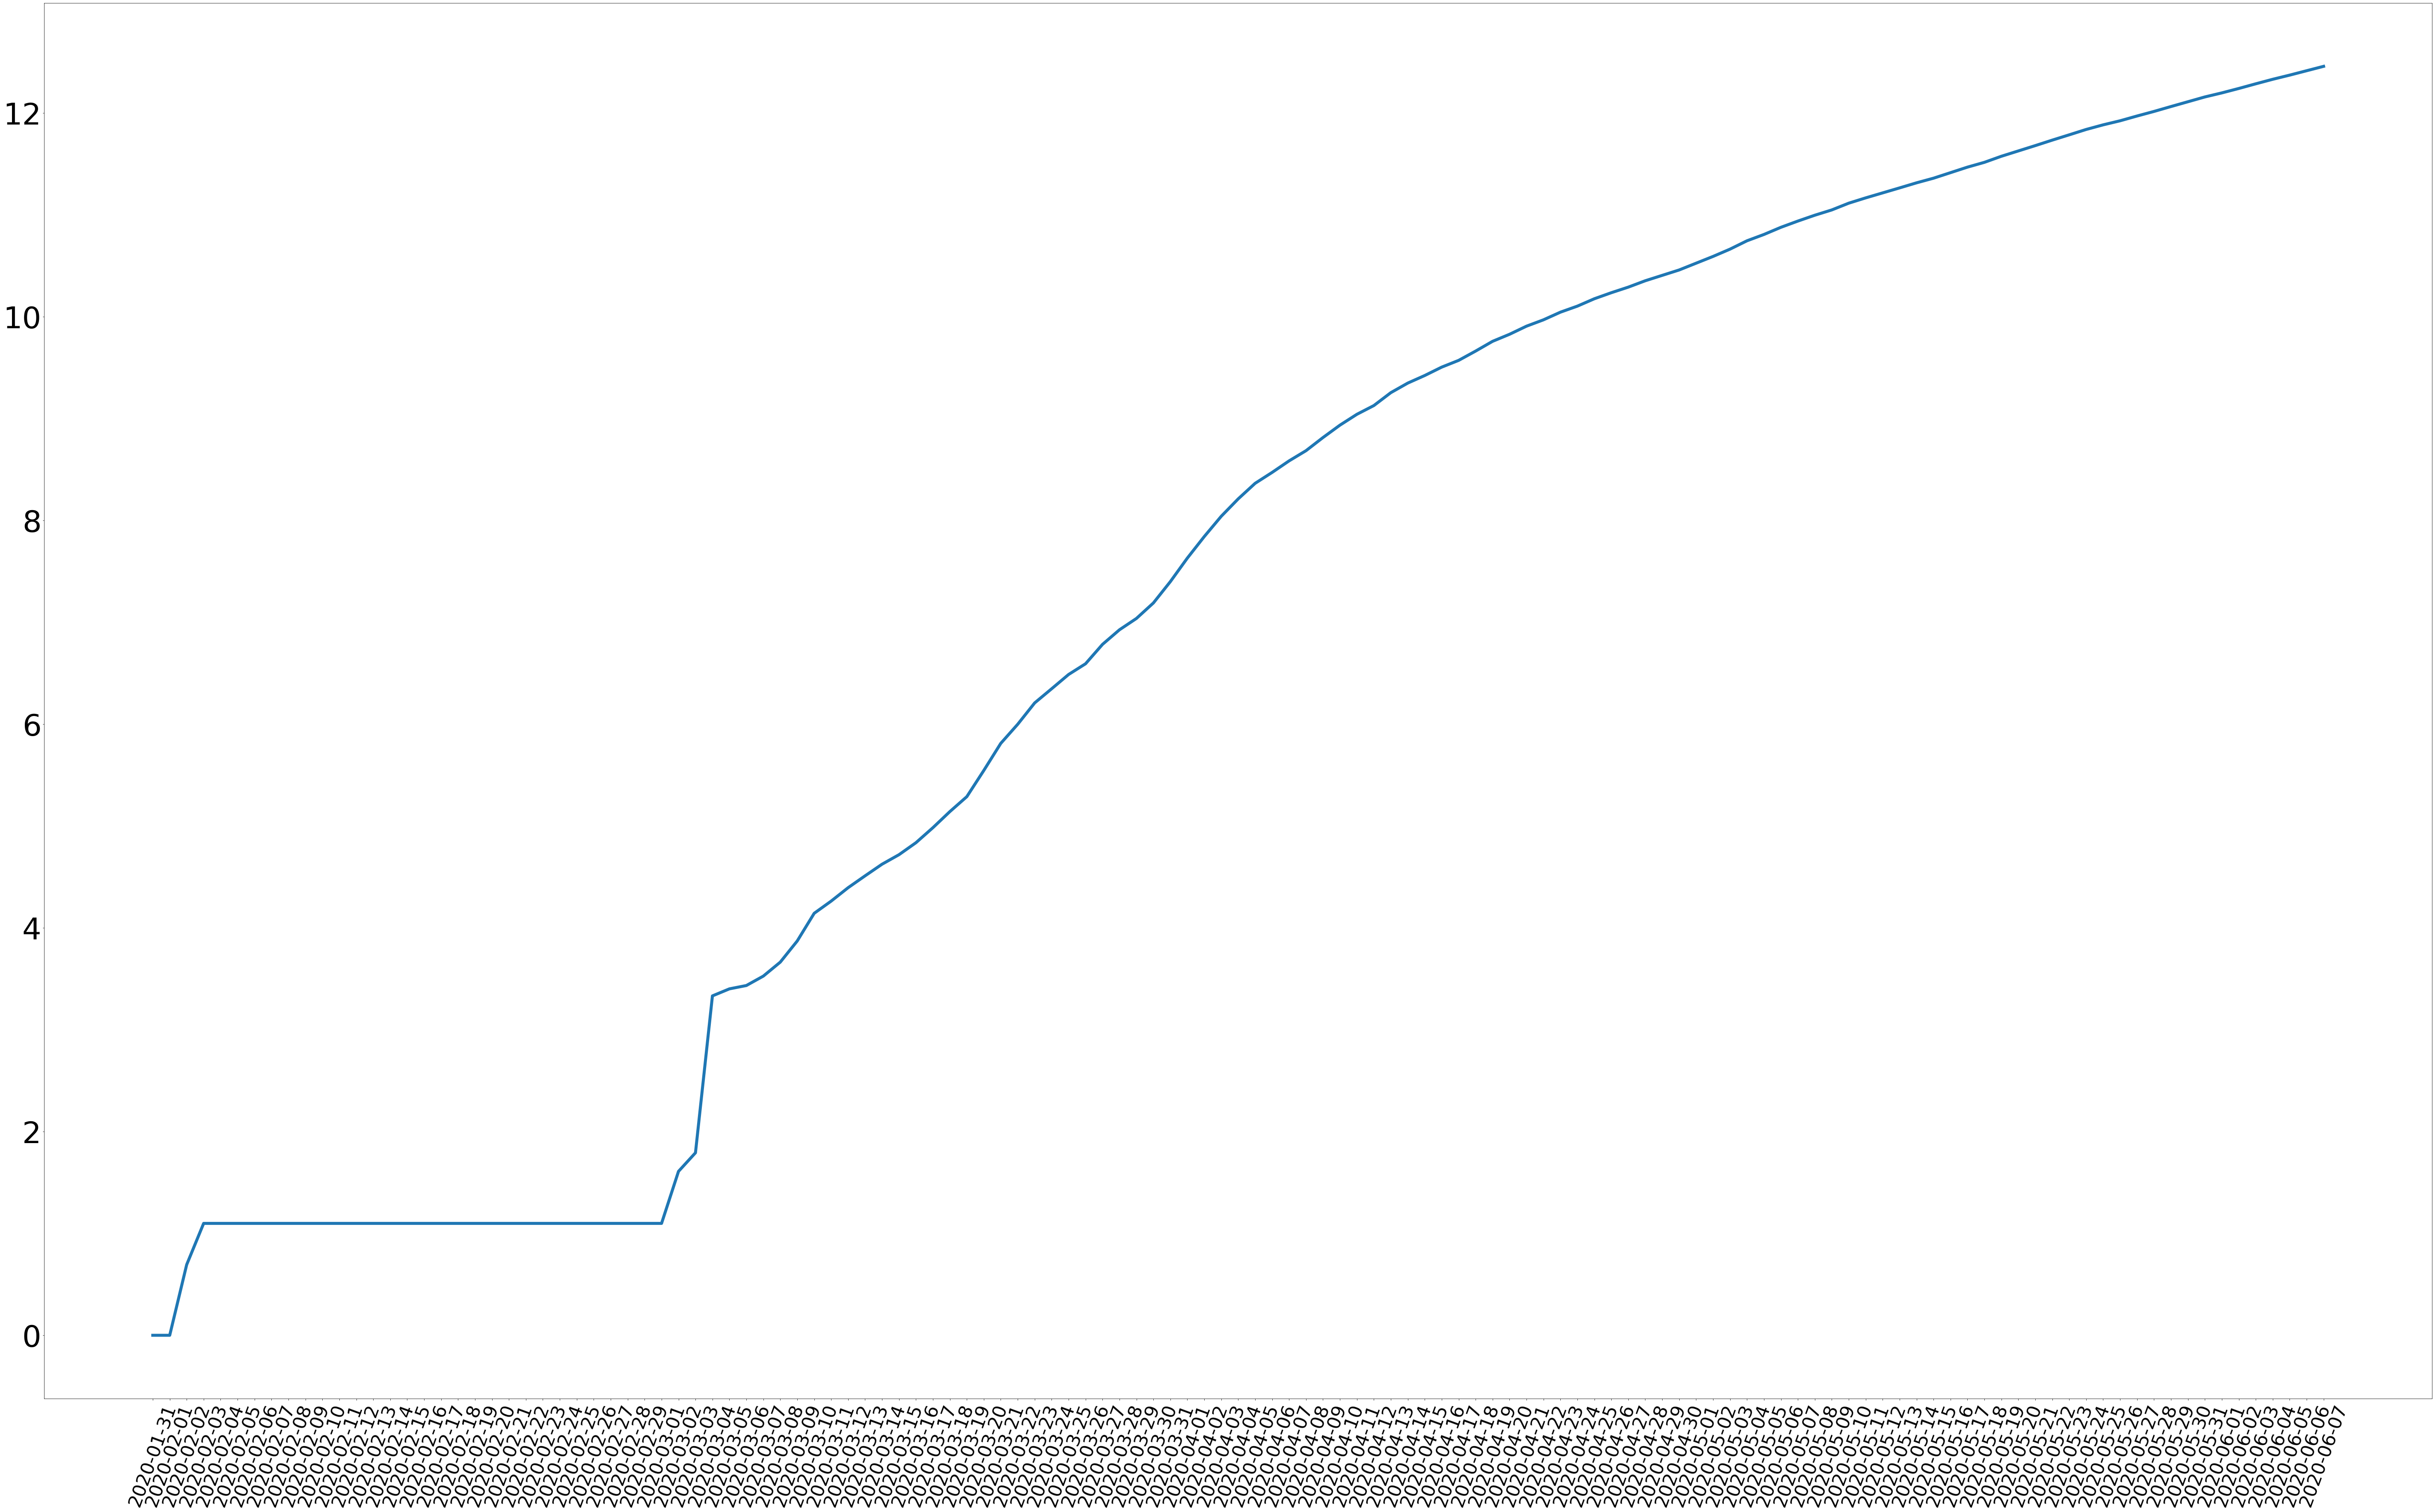

In [10]:
#estimating trend
#just consider log of indexeddataset, therefore nos on Y Axis have changed
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale,linewidth=7)
# plt.legend(fontsize=70)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text yticklabel objects>)

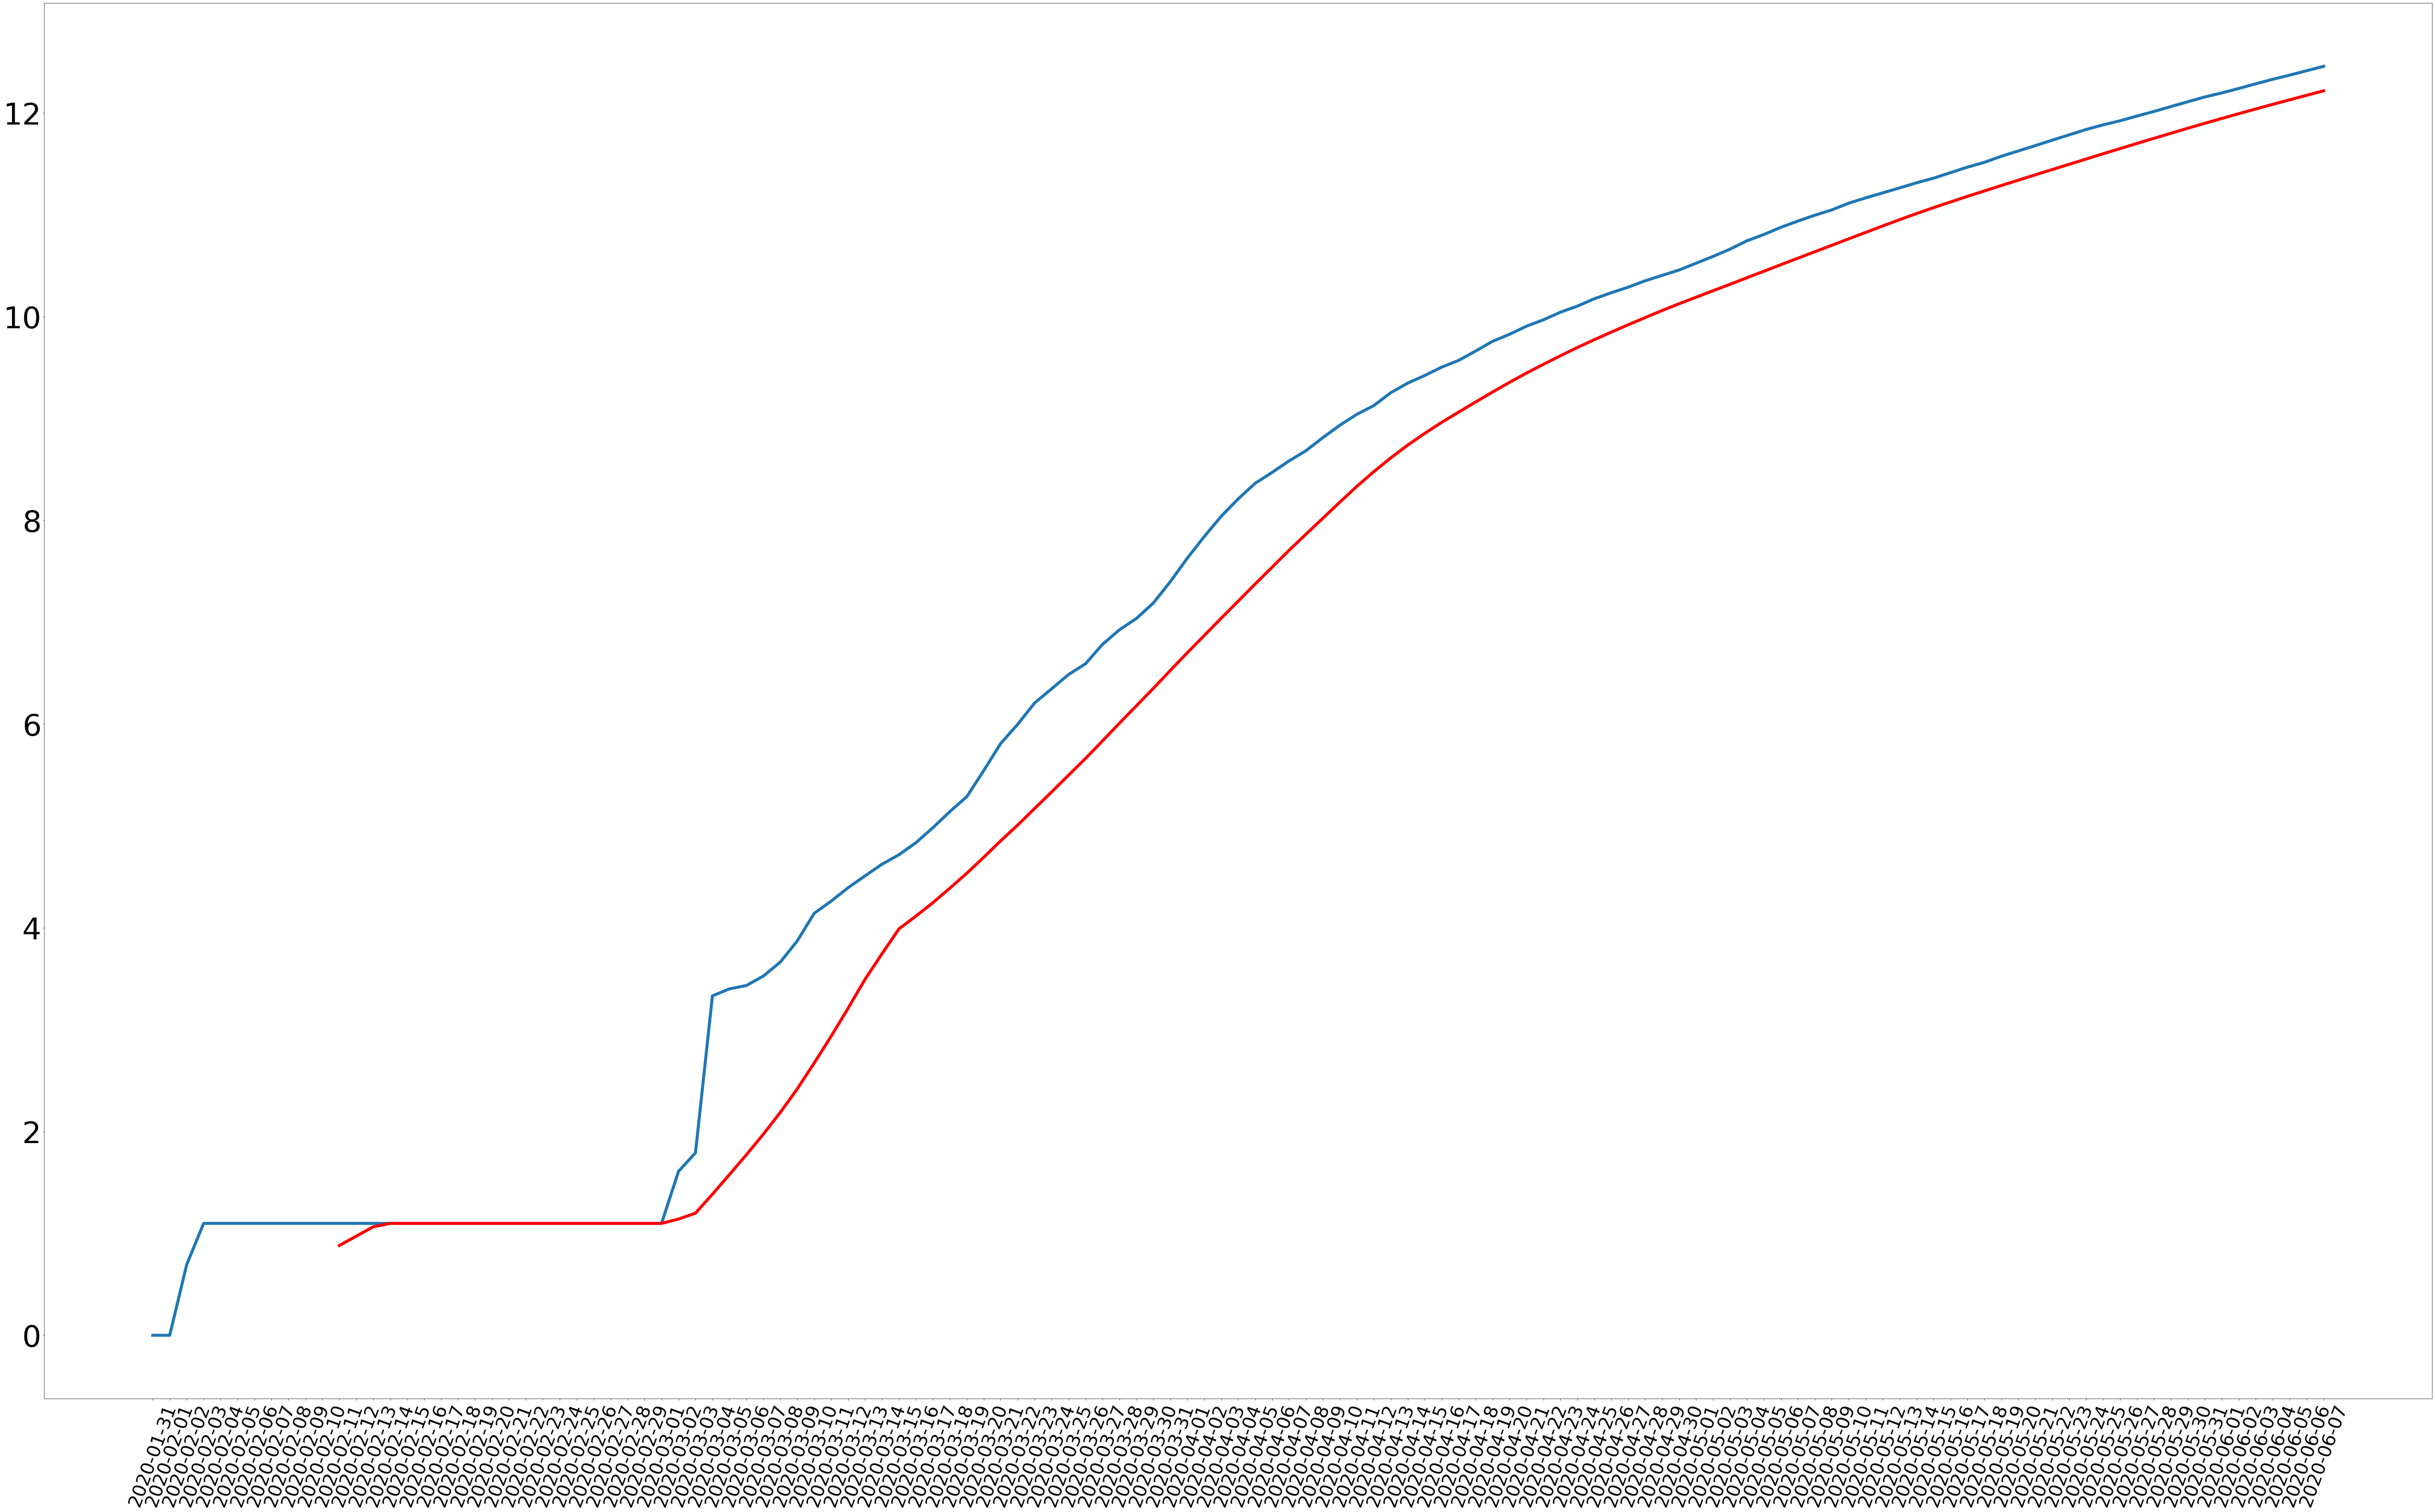

In [11]:
#calc MA with log time series
movingaverage = indexedDataset_logscale.rolling(window=12).mean()
movingSTD = indexedDataset_logscale.rolling(window=12).std()
#plt.plot(indexedDataset_logrolling)
plt.plot(indexedDataset_logscale,linewidth=7)
plt.plot(movingaverage, color='red',linewidth=7)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)

In [12]:
#get the difference btwn MA and actual no of passengers
#unless we perform all these transformations we'll not get TS to be stationary
#This is NOT a std way. There are many ways to do it.
datasetlogscaleminusmovingavg = indexedDataset_logscale - movingaverage
datasetlogscaleminusmovingavg.head(5)

totalconfirmed
date                      
2020-01-31             NaN
2020-02-01             NaN
2020-02-02             NaN
2020-02-03             NaN
2020-02-04             NaN

In [13]:
#remove nan values
datasetlogscaleminusmovingavg.dropna(inplace=True)
datasetlogscaleminusmovingavg.head(5)

totalconfirmed
date                      
2020-02-11    2.168908e-01
2020-02-12    1.253398e-01
2020-02-13    3.378876e-02
2020-02-14    2.220446e-16
2020-02-15    2.220446e-16

In [14]:
#we're performing this to see if TS is stationary or not
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    
    #Determining rolling stats
    movingaverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling stats
    orig = plt.plot(timeseries,linewidth=7, color='blue', label='original')
    mean = plt.plot(movingaverage,linewidth=7, color='red', label='rolling mean')
    std = plt.plot(movingSTD,linewidth=7, color='black',label='std dev')
    plt.legend(loc='best', fontsize=70)
    plt.title('Rolling mean & Std dev', fontsize=100)
    plt.xticks(fontsize='x-large',rotation=70)
    plt.yticks(fontsize=70)
    plt.show()
    
    #Dickey Fuller test
    print('Result of Dickey fuller test:')
    timeseries = timeseries[timeseries != 0]
    inf = float('inf')
    timeseries = timeseries[timeseries != inf]
    timeseries = dataset.set_index(['date'])
    timeseries = timeseries.fillna(method='ffill')
    dftest = adfuller(timeseries['totalconfirmed'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','no of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
    

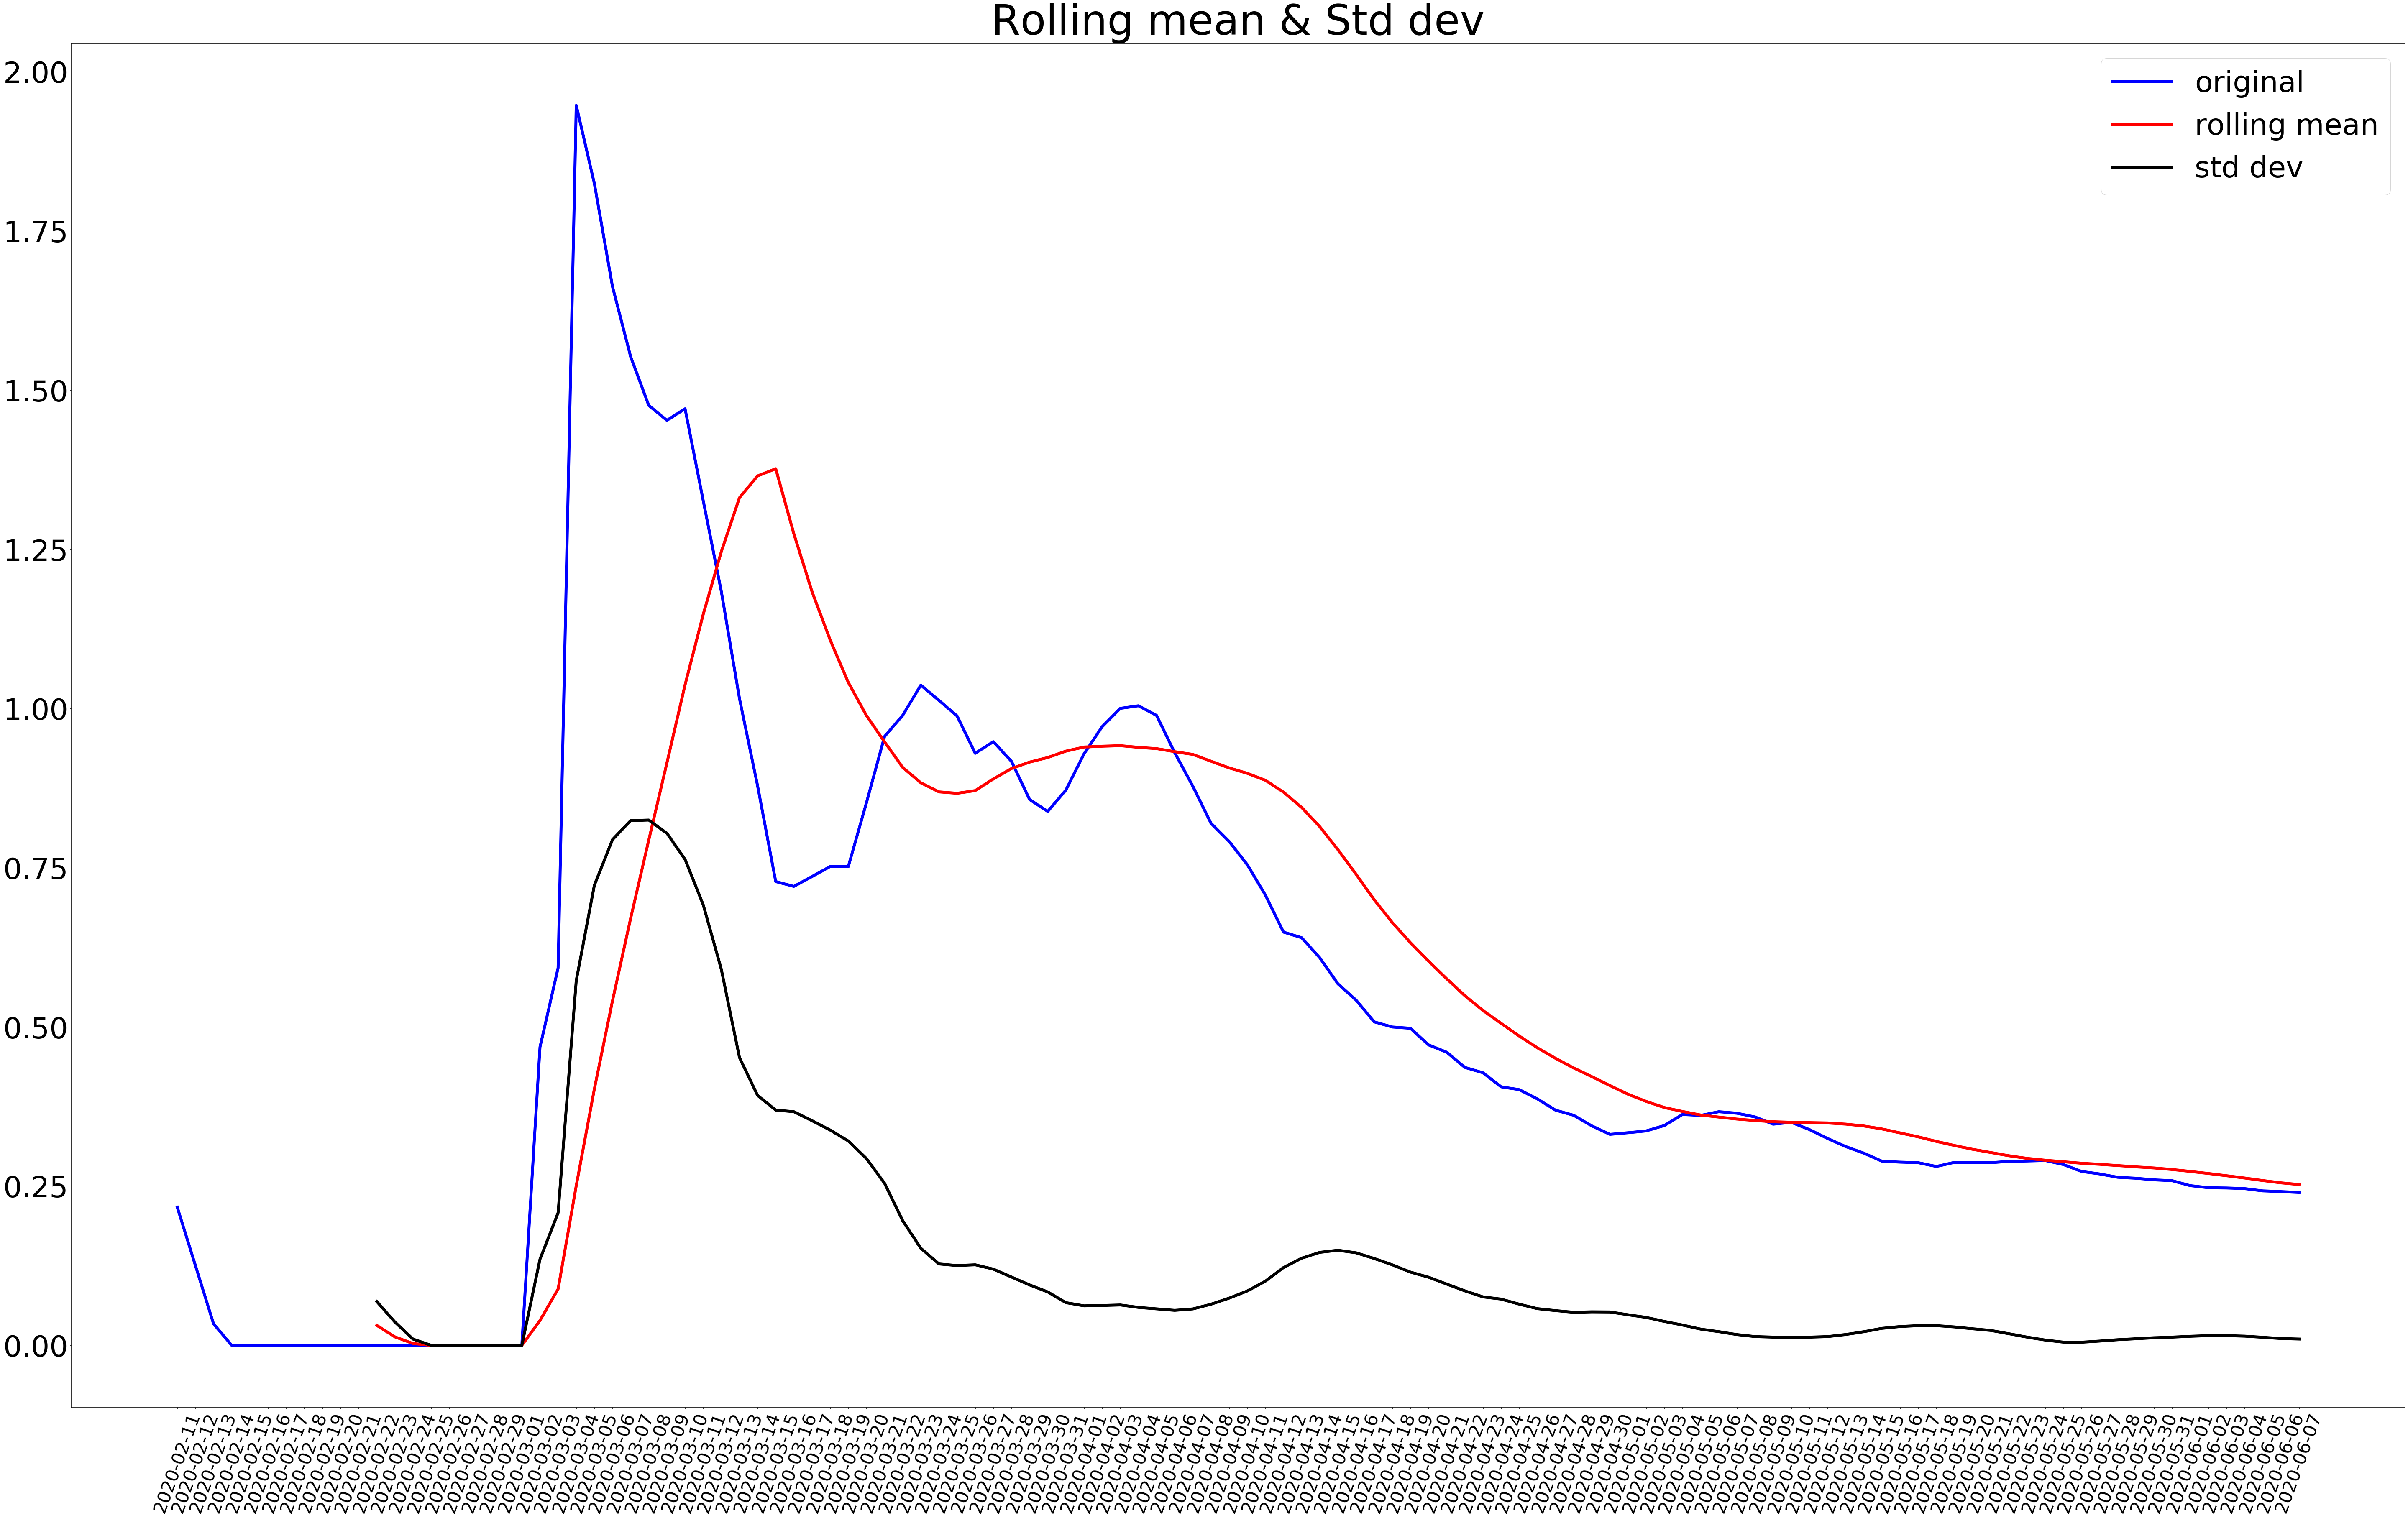

Result of Dickey fuller test:
Test Statistic               0.677910
p-value                      0.989387
#lags used                   6.000000
no of observations used    123.000000
Critical value (1%)         -3.484667
Critical value (5%)         -2.885340
Critical value (10%)        -2.579463
dtype: float64


In [15]:
#here we see that the p value has decreased from 0.99 to 0.02
test_stationary(datasetlogscaleminusmovingavg)


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text yticklabel objects>)

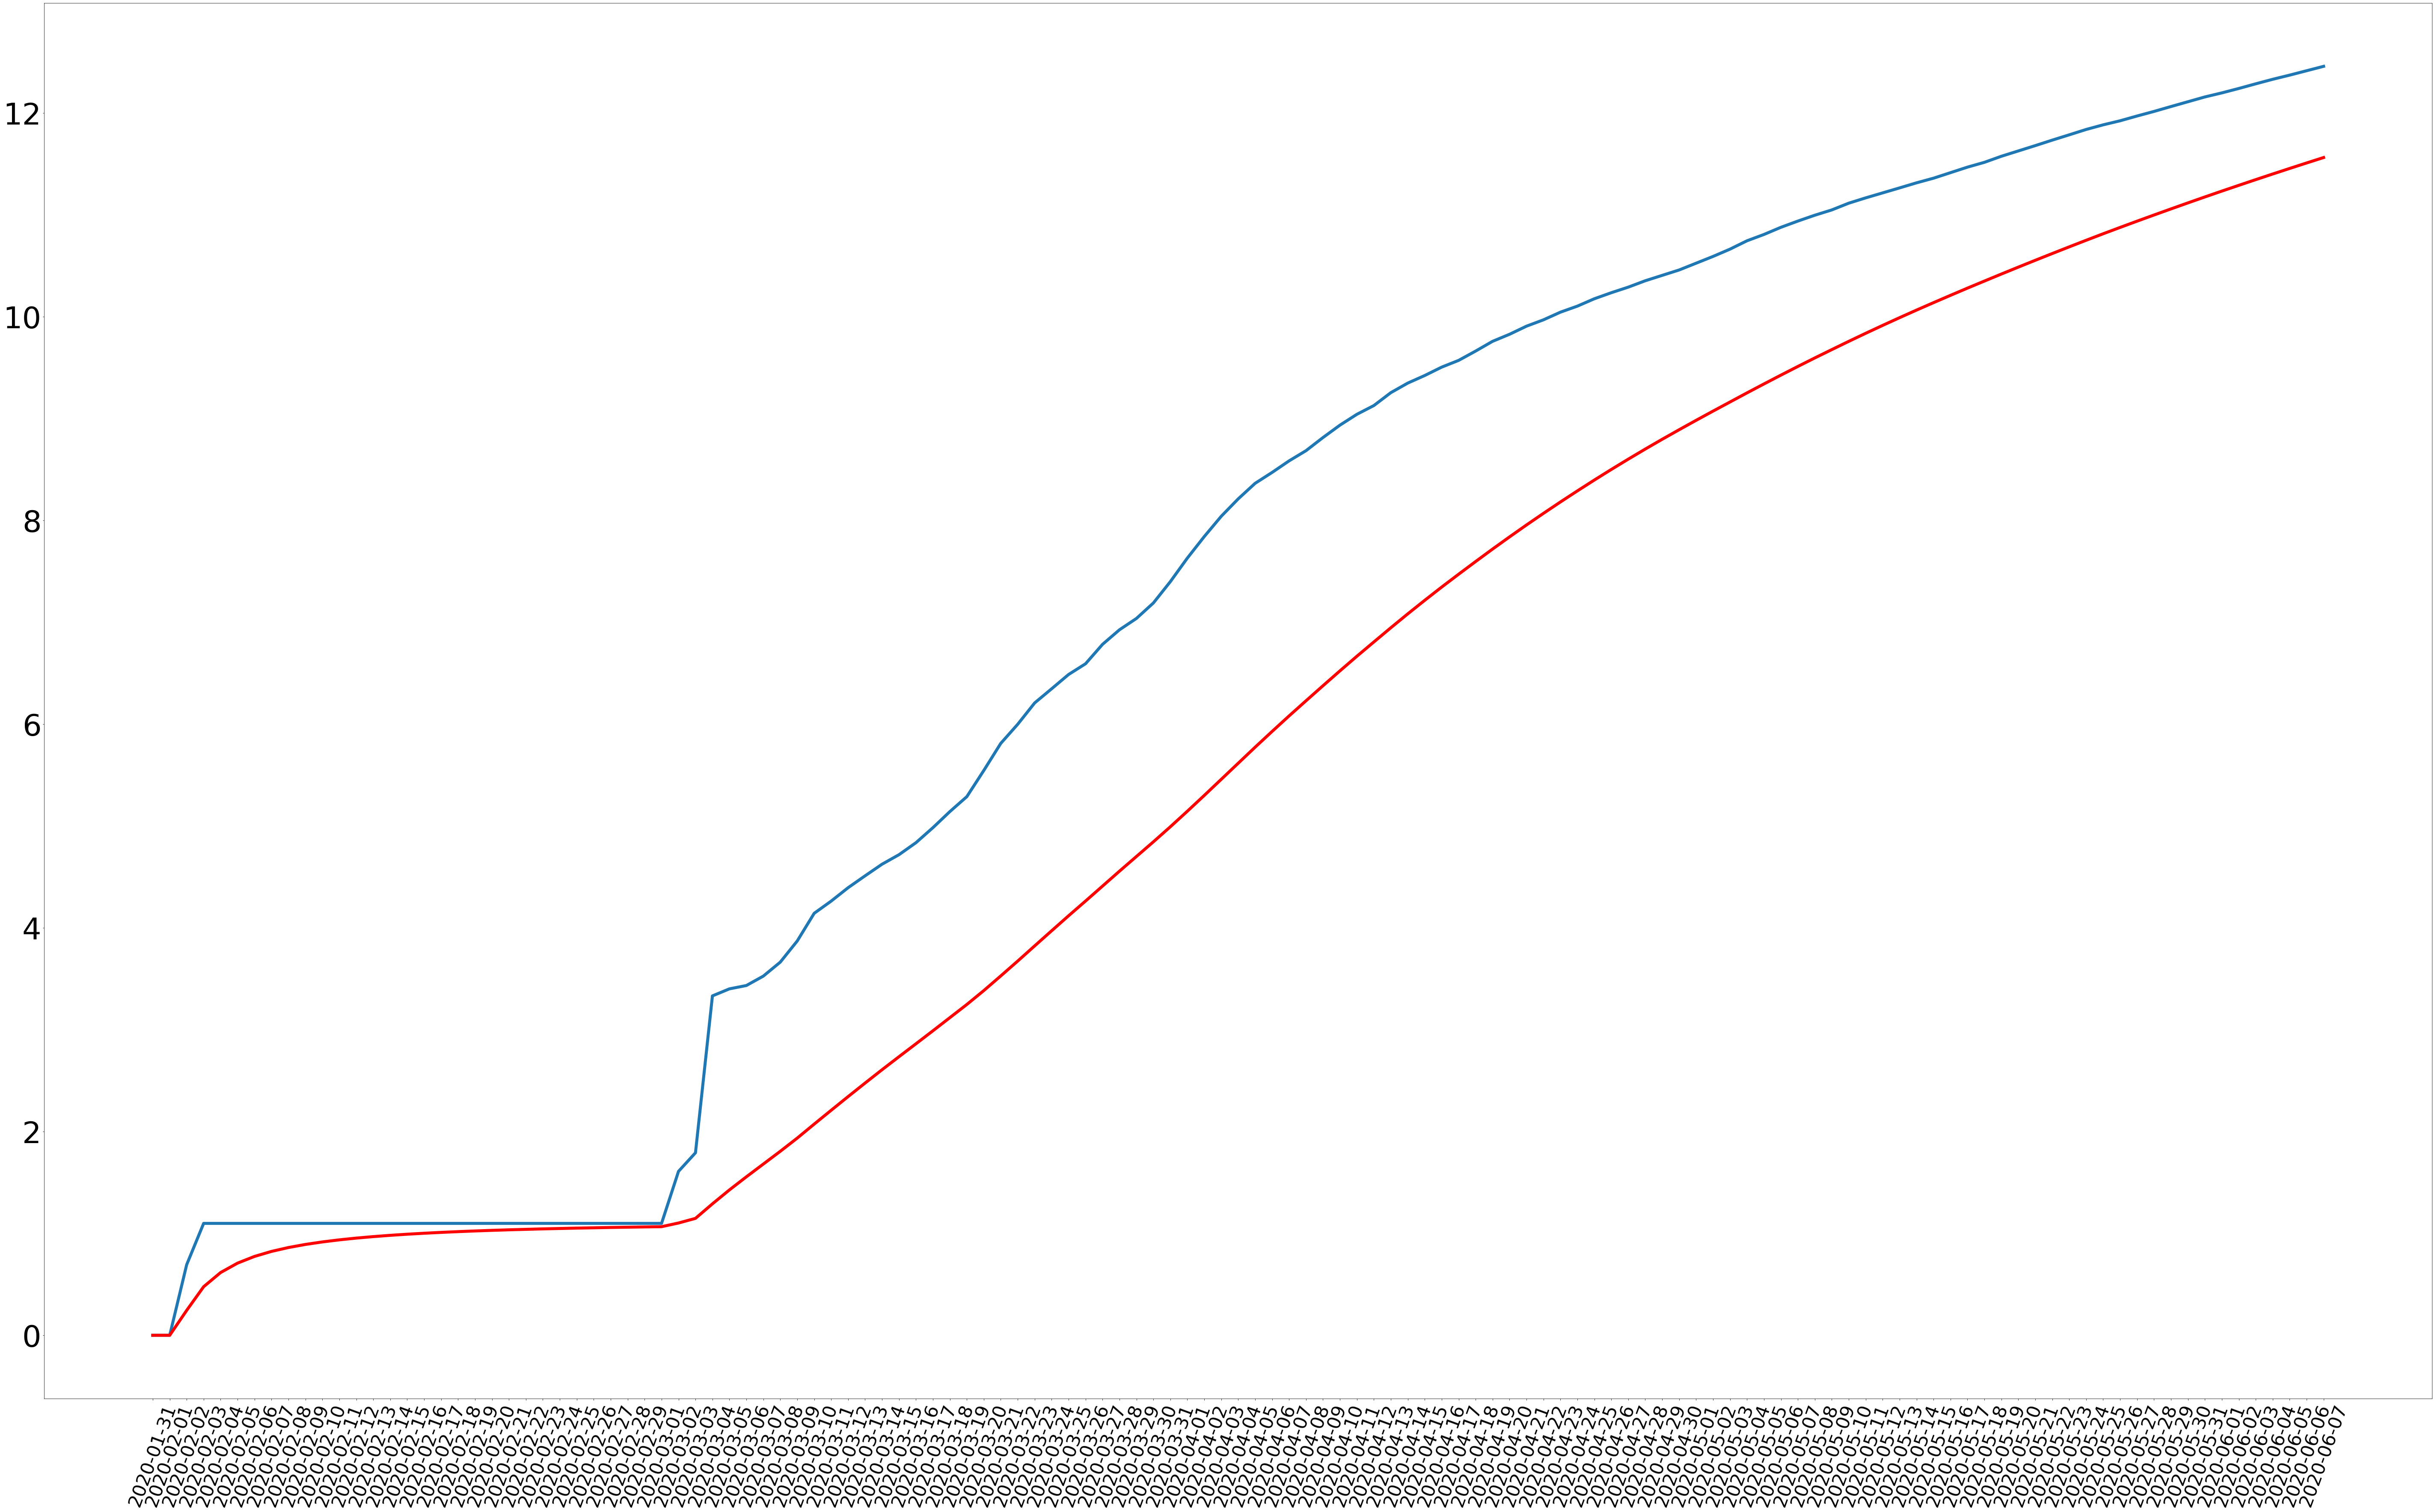

In [16]:
#now we calculate the weighted avg in TS, to see the trend
#we see upward trend
exponentialdecaywtdavg = indexedDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logscale,linewidth=7)
plt.plot(exponentialdecaywtdavg,linewidth=7, color='red')
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)

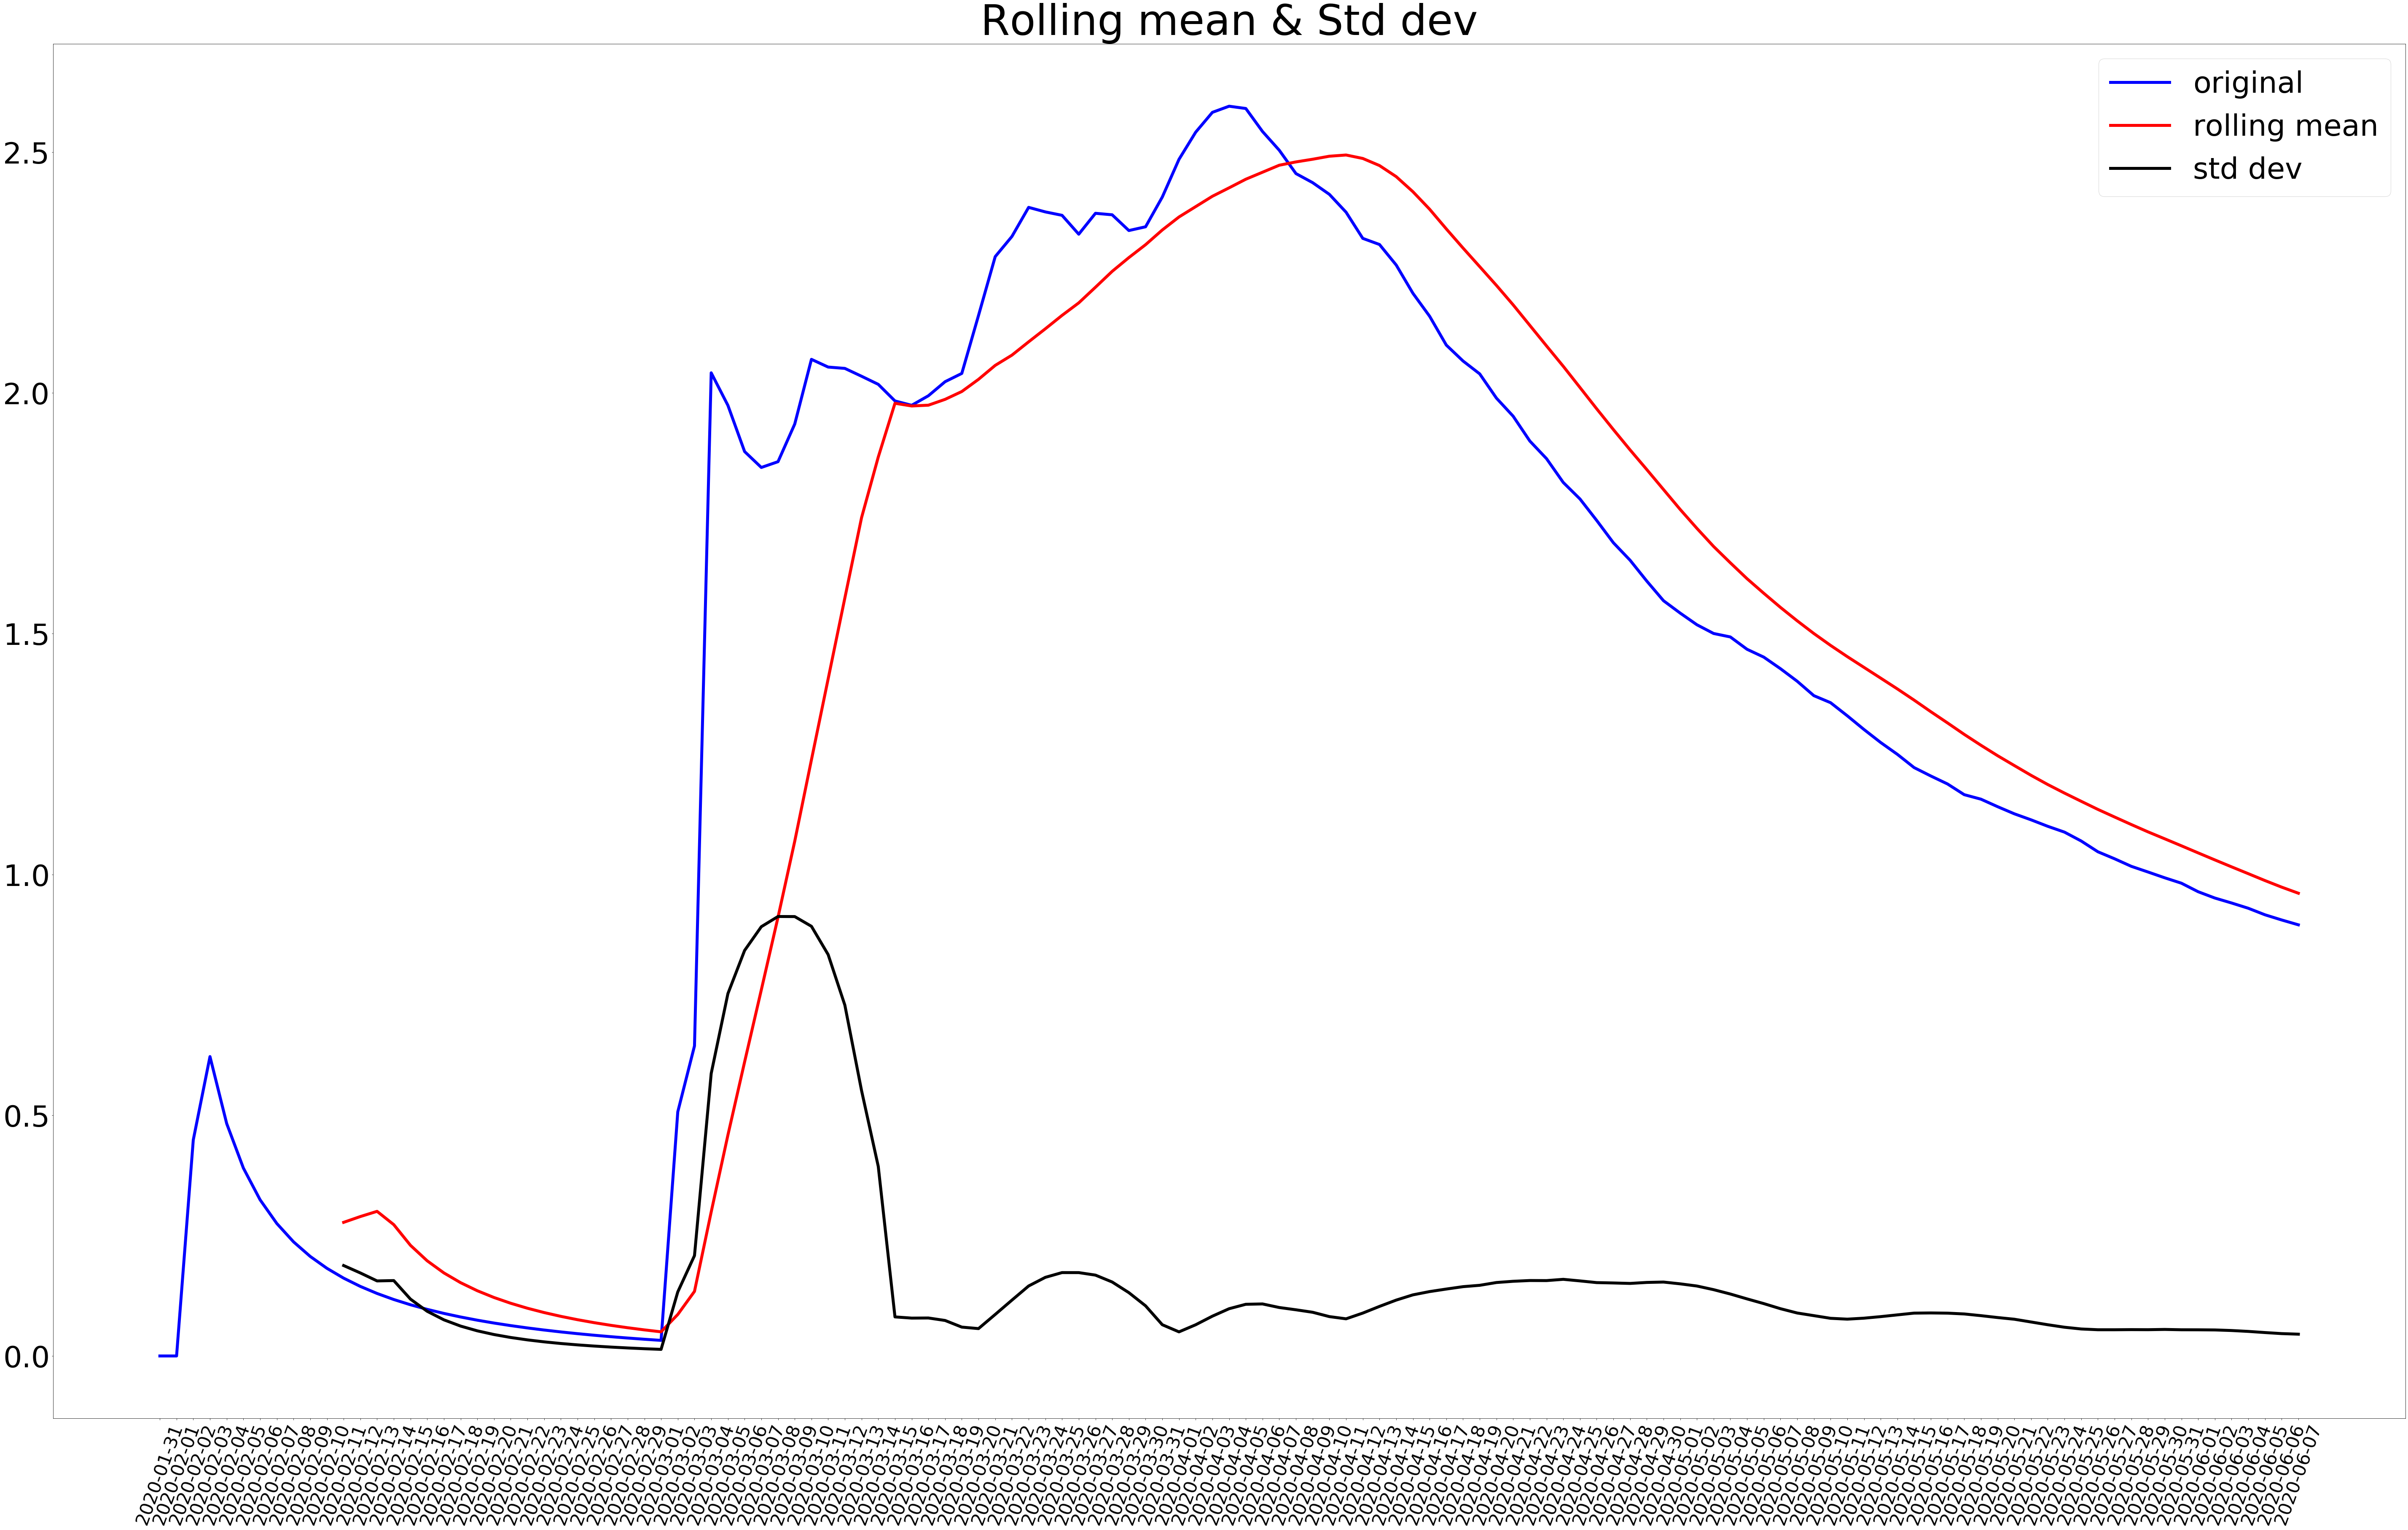

Result of Dickey fuller test:
Test Statistic               0.677910
p-value                      0.989387
#lags used                   6.000000
no of observations used    123.000000
Critical value (1%)         -3.484667
Critical value (5%)         -2.885340
Critical value (10%)        -2.579463
dtype: float64


In [17]:
#here we remove the weighted avg,, to check for stationarity

datasetlogscaleminusmovexpodecayavg = indexedDataset_logscale - exponentialdecaywtdavg
test_stationary(datasetlogscaleminusmovexpodecayavg)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8]),
 <a list of 11 Text yticklabel objects>)

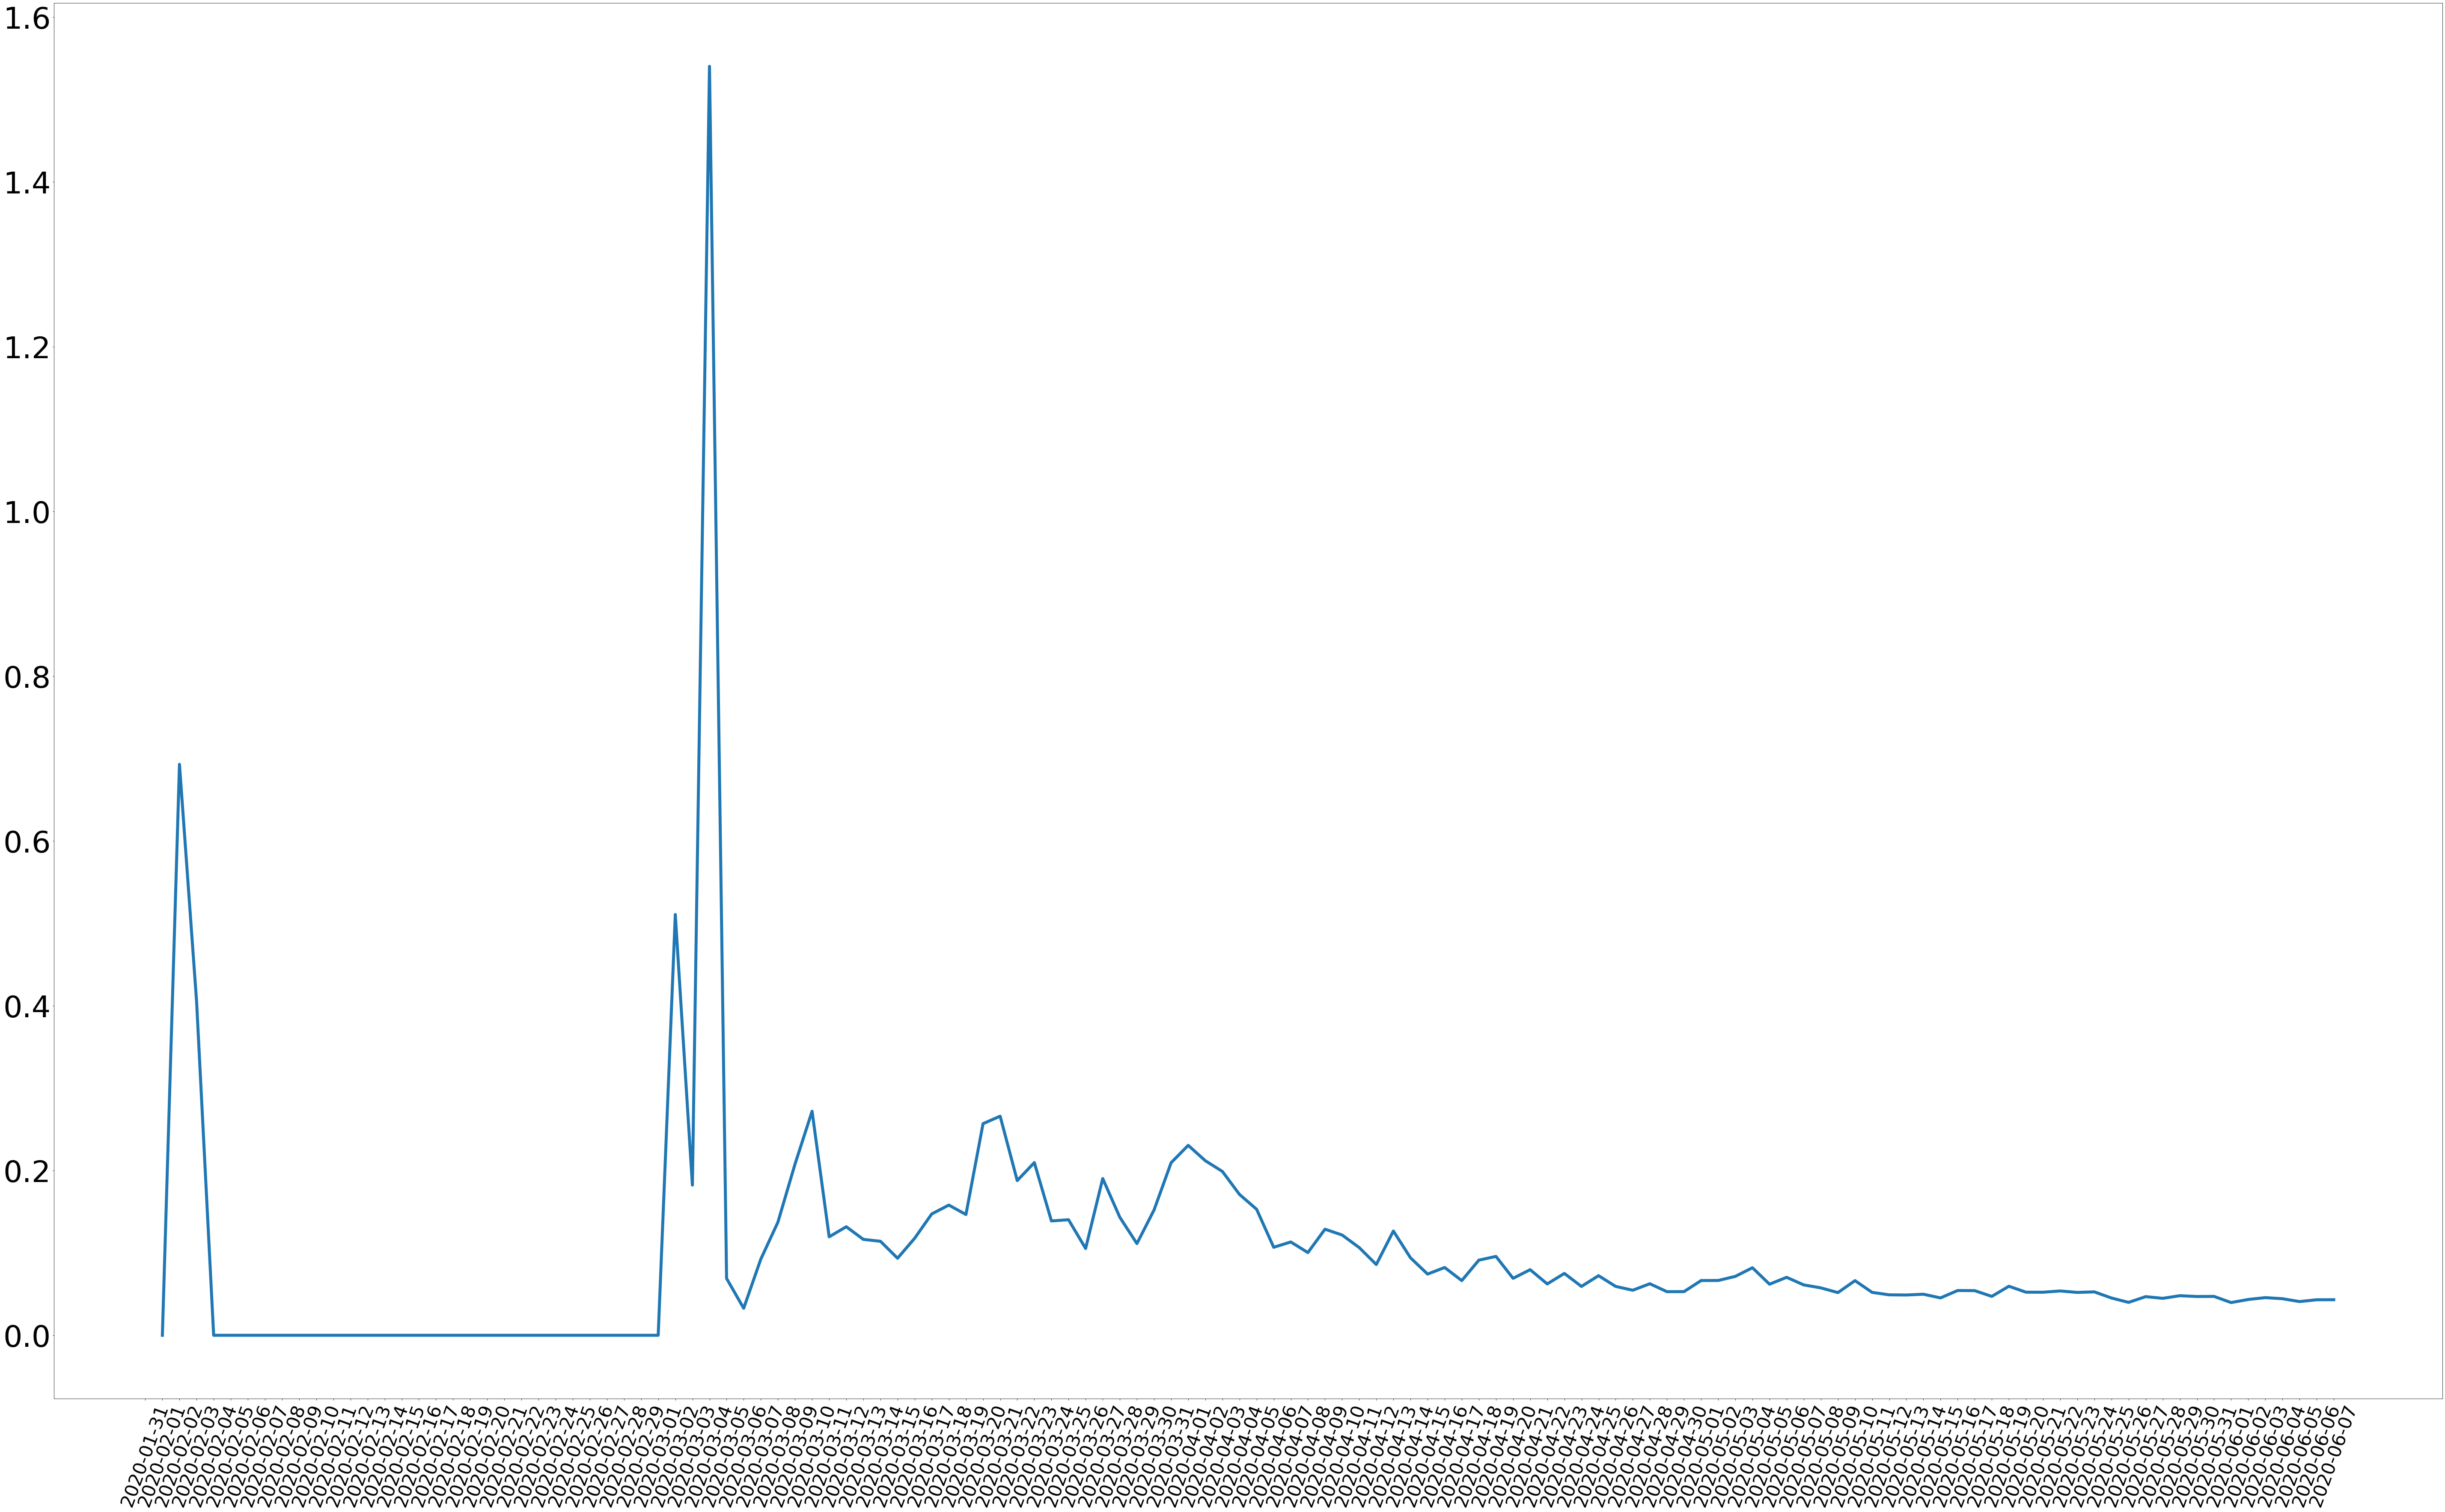

In [18]:
datasetlogdiffshifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetlogdiffshifting,linewidth=7)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)

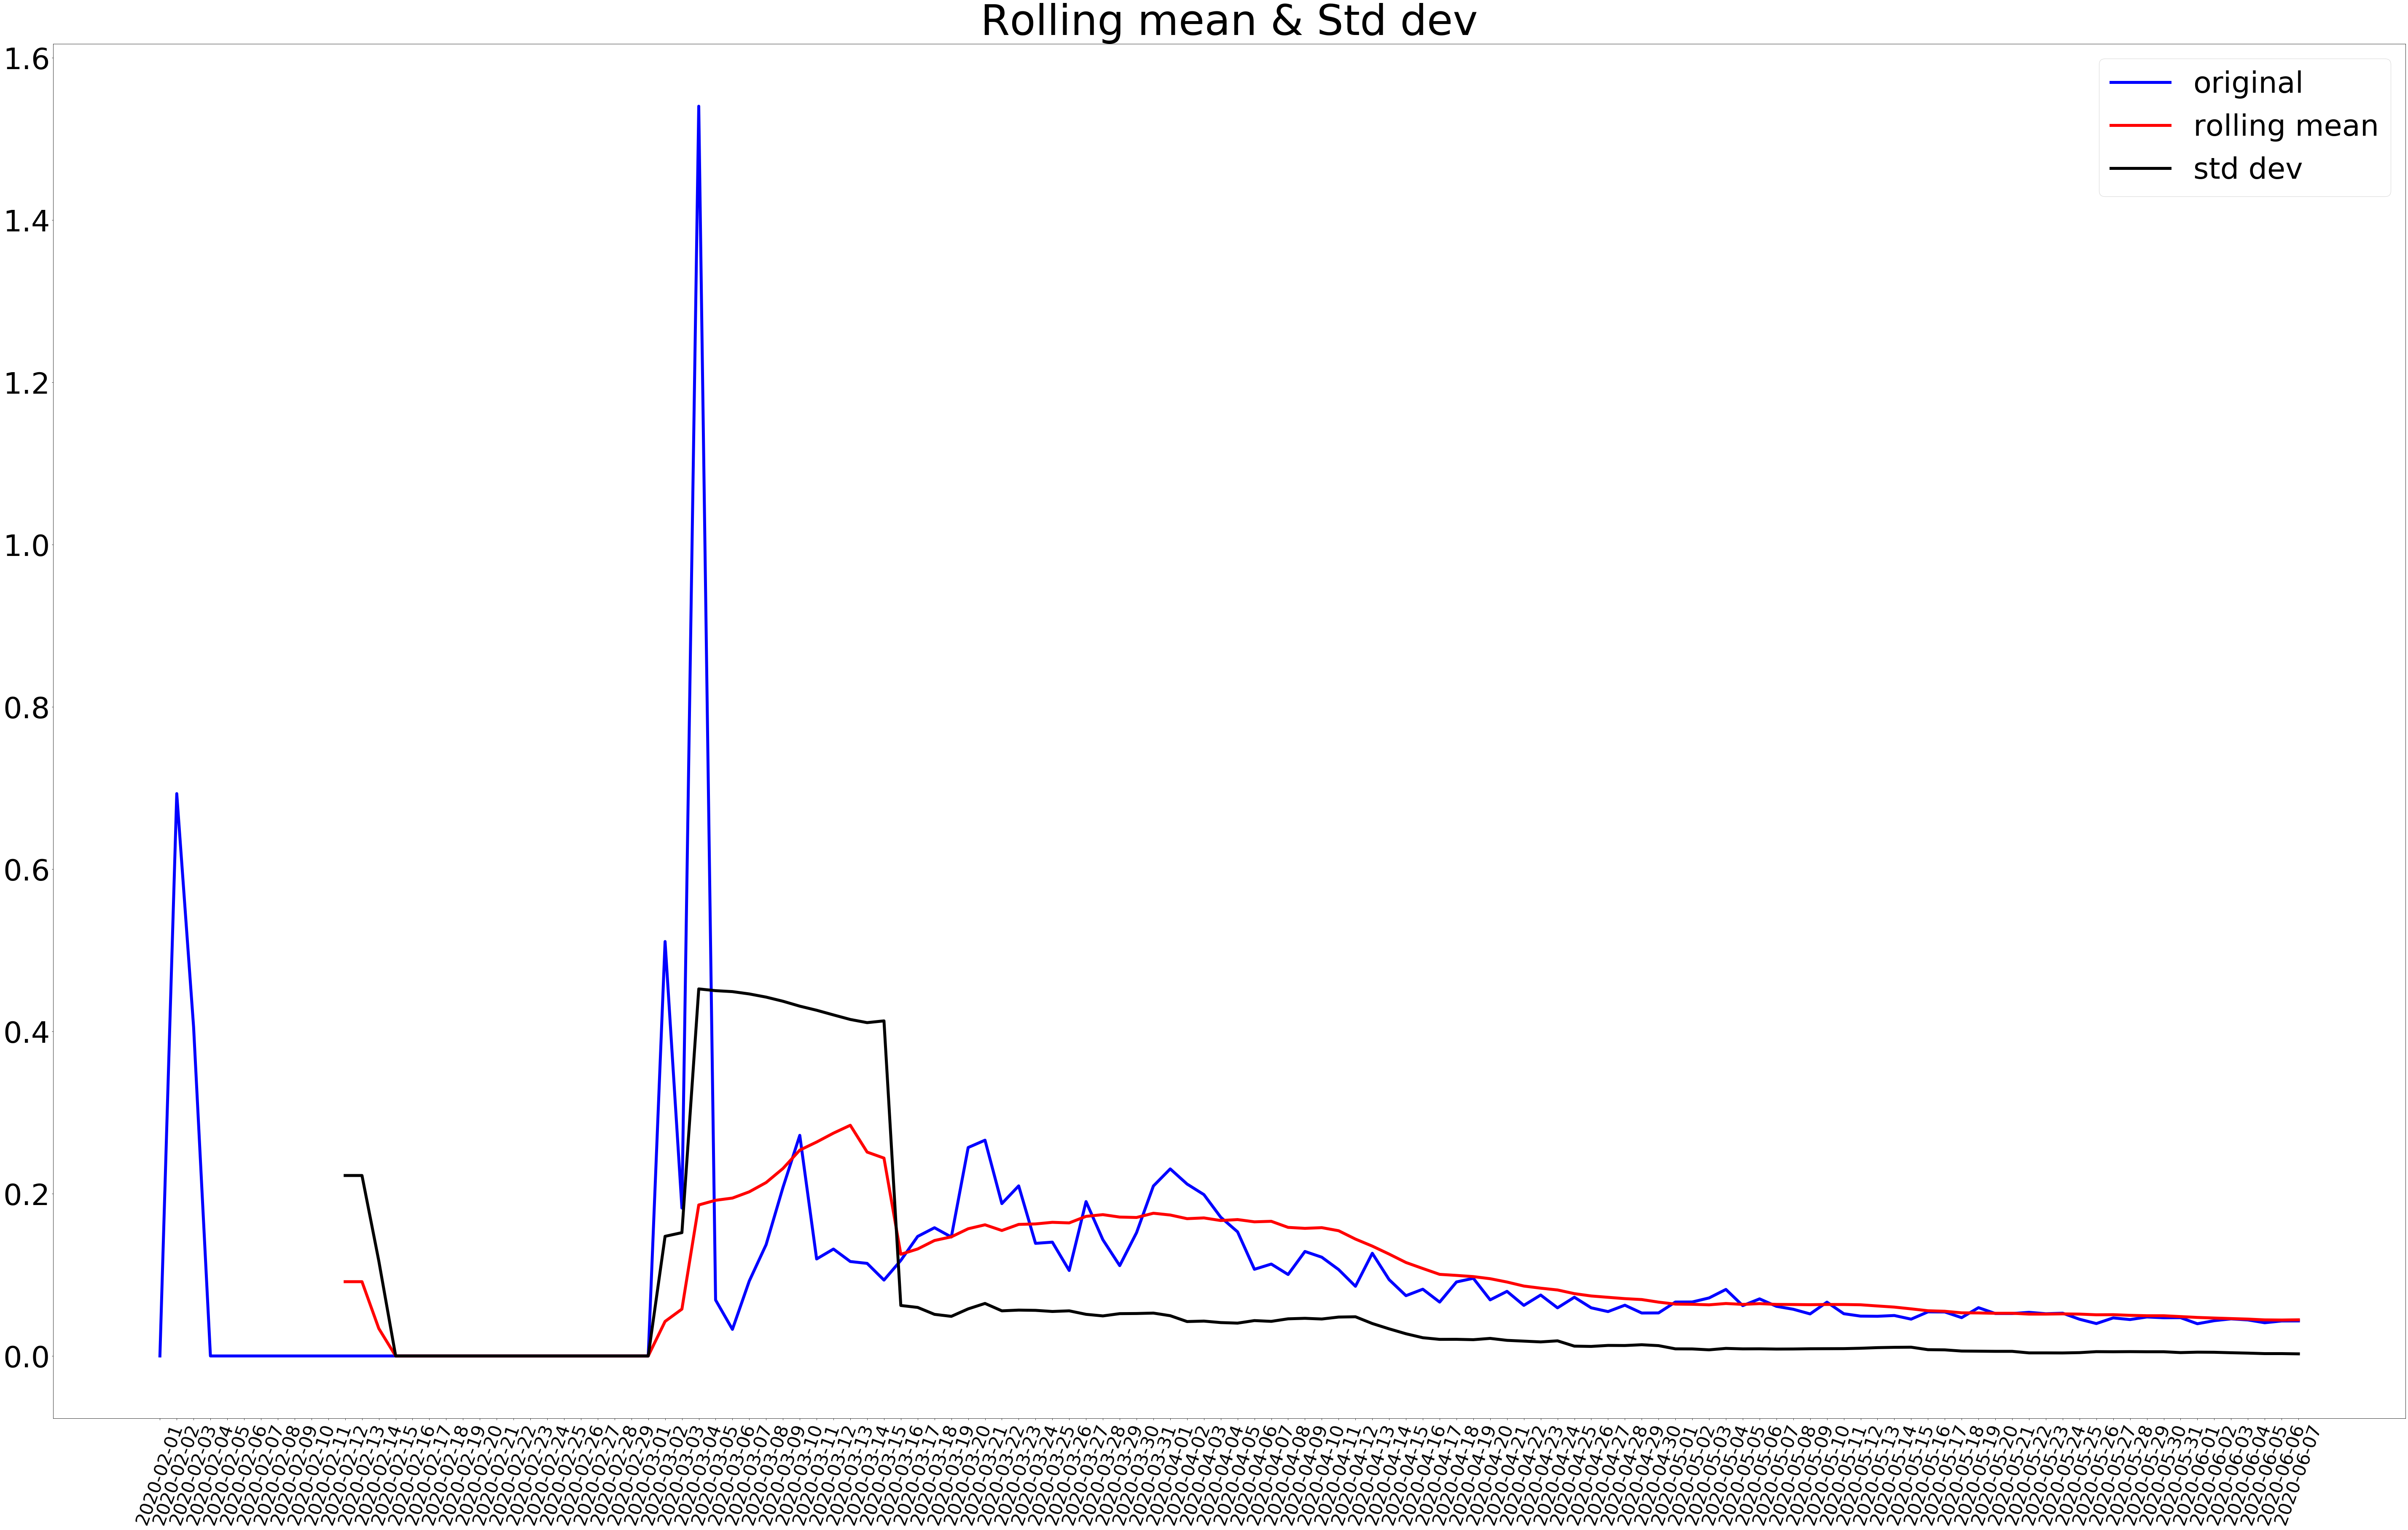

Result of Dickey fuller test:
Test Statistic               0.677910
p-value                      0.989387
#lags used                   6.000000
no of observations used    123.000000
Critical value (1%)         -3.484667
Critical value (5%)         -2.885340
Critical value (10%)        -2.579463
dtype: float64


In [19]:
datasetlogdiffshifting.dropna(inplace=True)
test_stationary(datasetlogdiffshifting)

/home/vineeth/anaconda3/envs/MBA/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


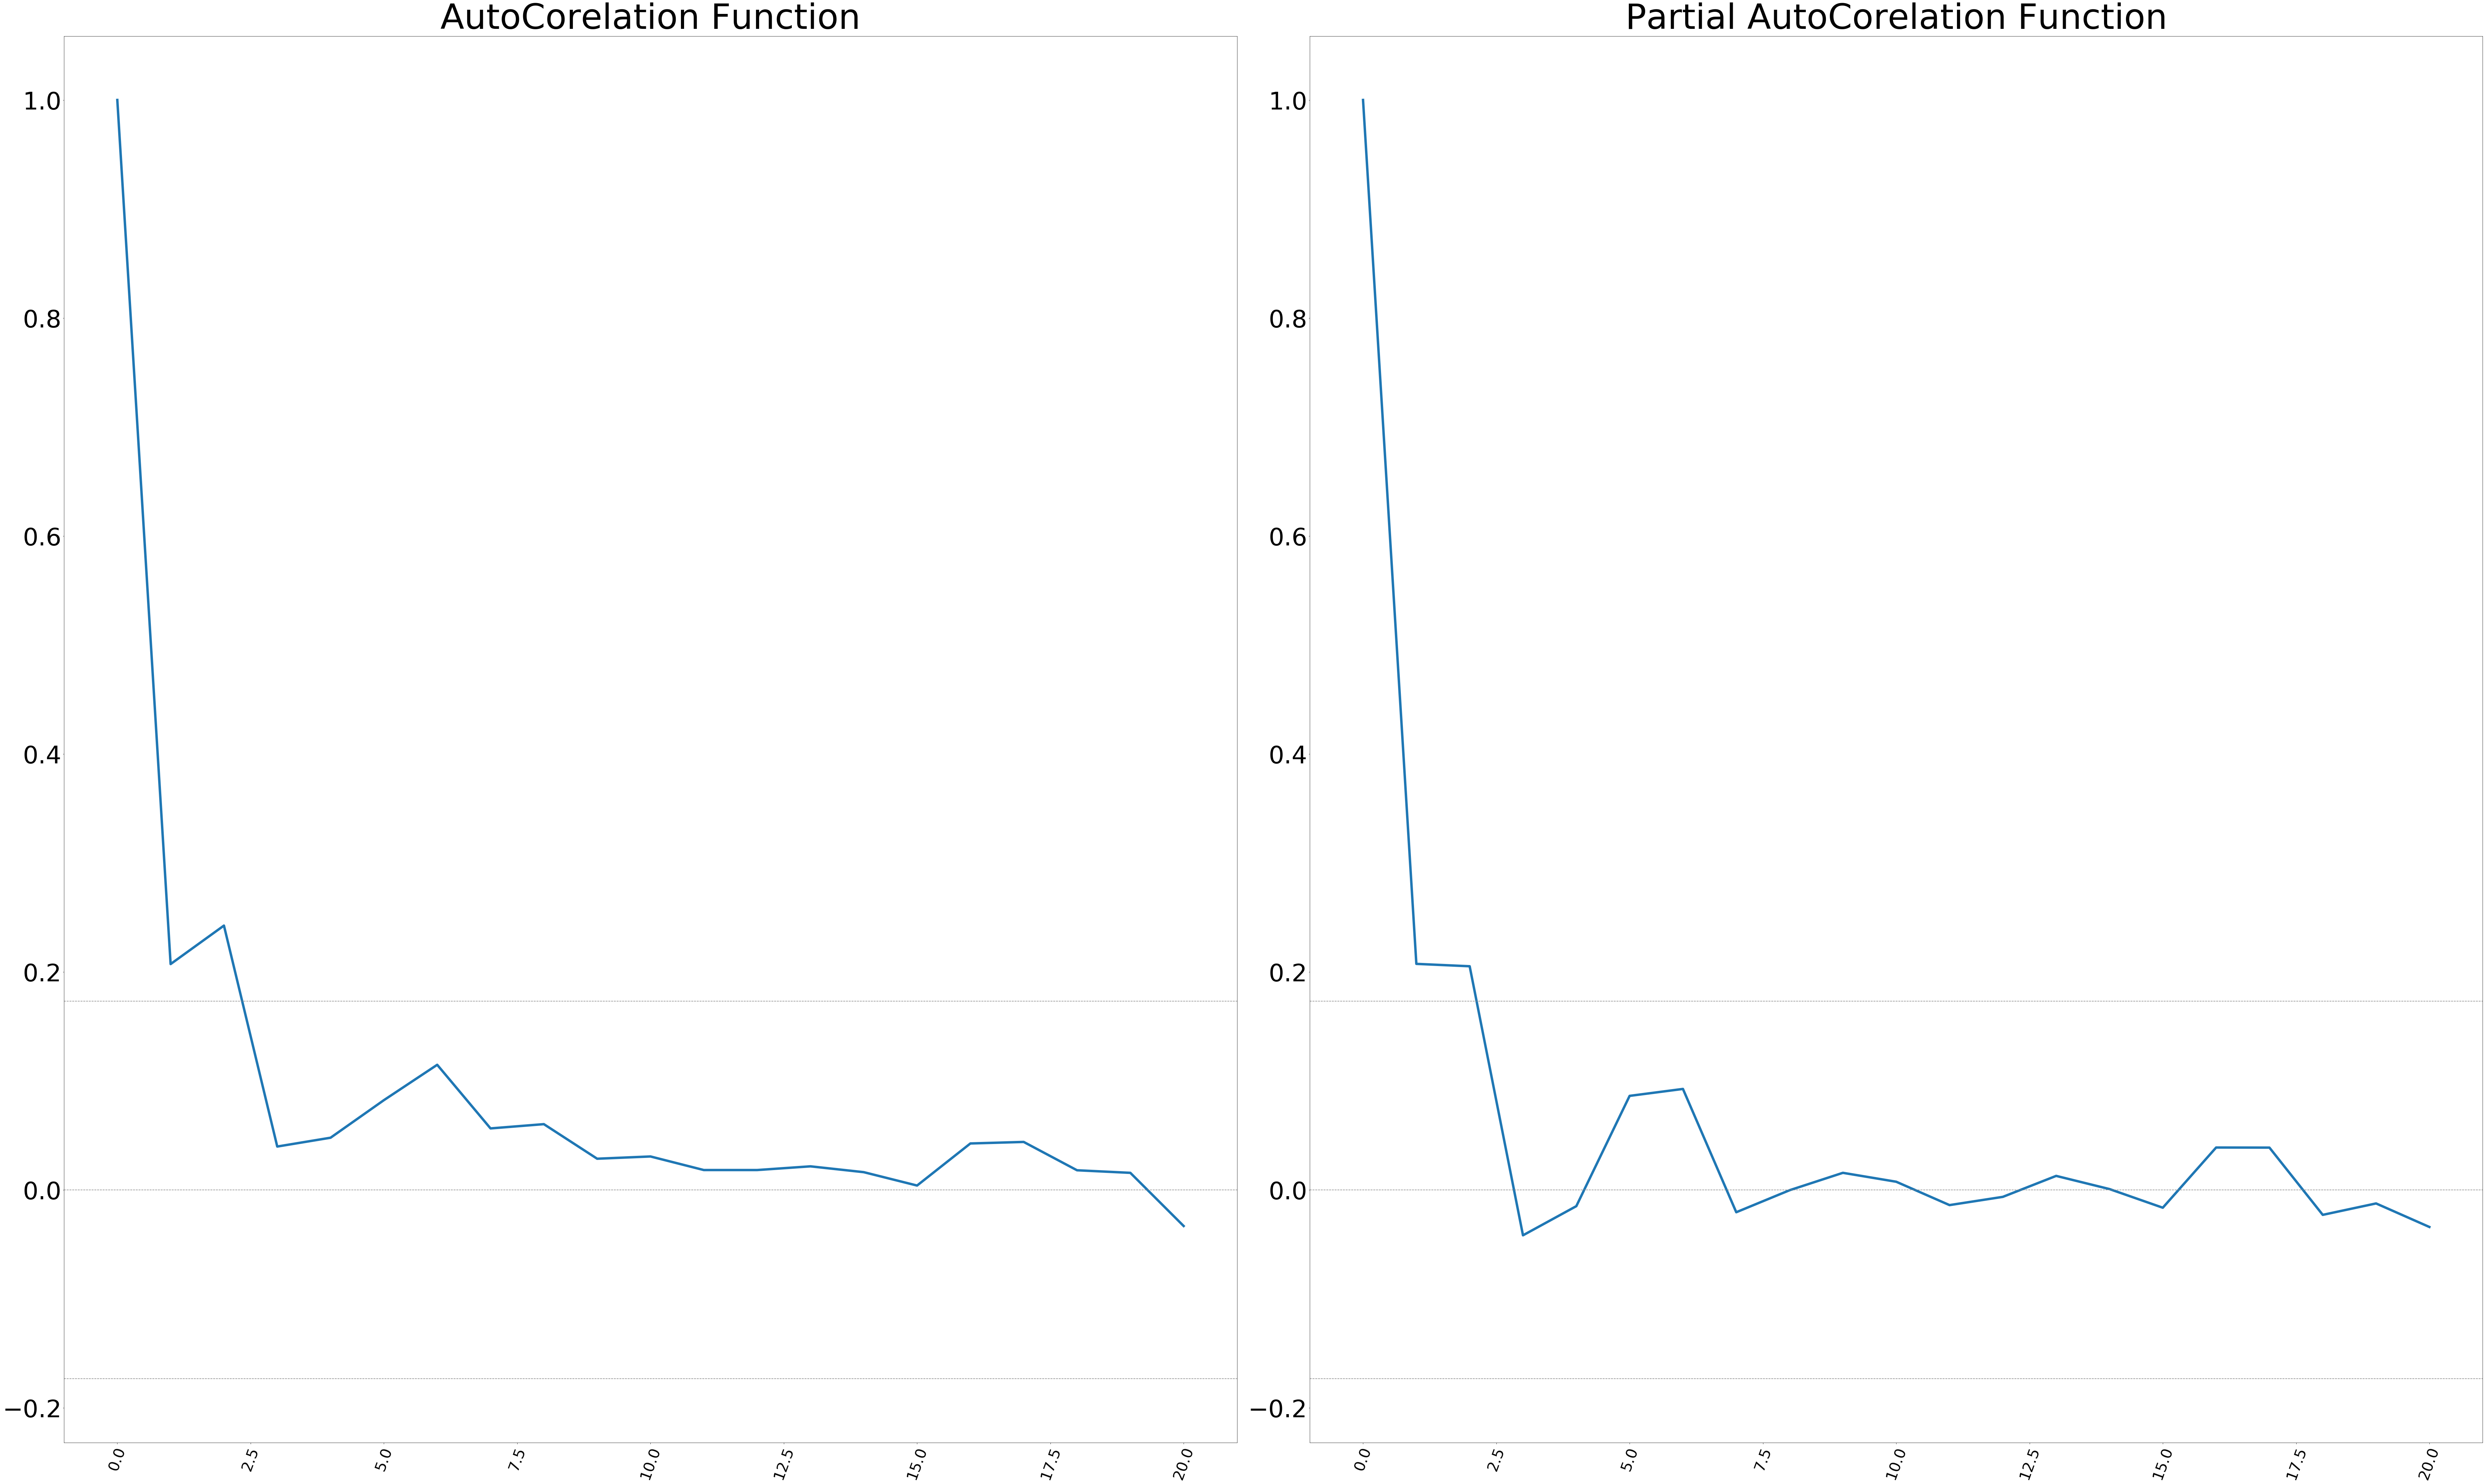

In [20]:
#ACF and PACF model
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogdiffshifting, nlags=20)
lag_pacf = pacf(datasetlogdiffshifting, nlags=20, method='ols')

#PLOT ACF
plt.subplot(121)
plt.plot(lag_acf,linewidth=7)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)
plt.title('AutoCorelation Function', fontsize=100)

#PLOT PACF
plt.subplot(122)
plt.plot(lag_pacf,linewidth=7)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial AutoCorelation Function', fontsize=100)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)
plt.tight_layout()

/home/vineeth/anaconda3/envs/MBA/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/vineeth/anaconda3/envs/MBA/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR Model


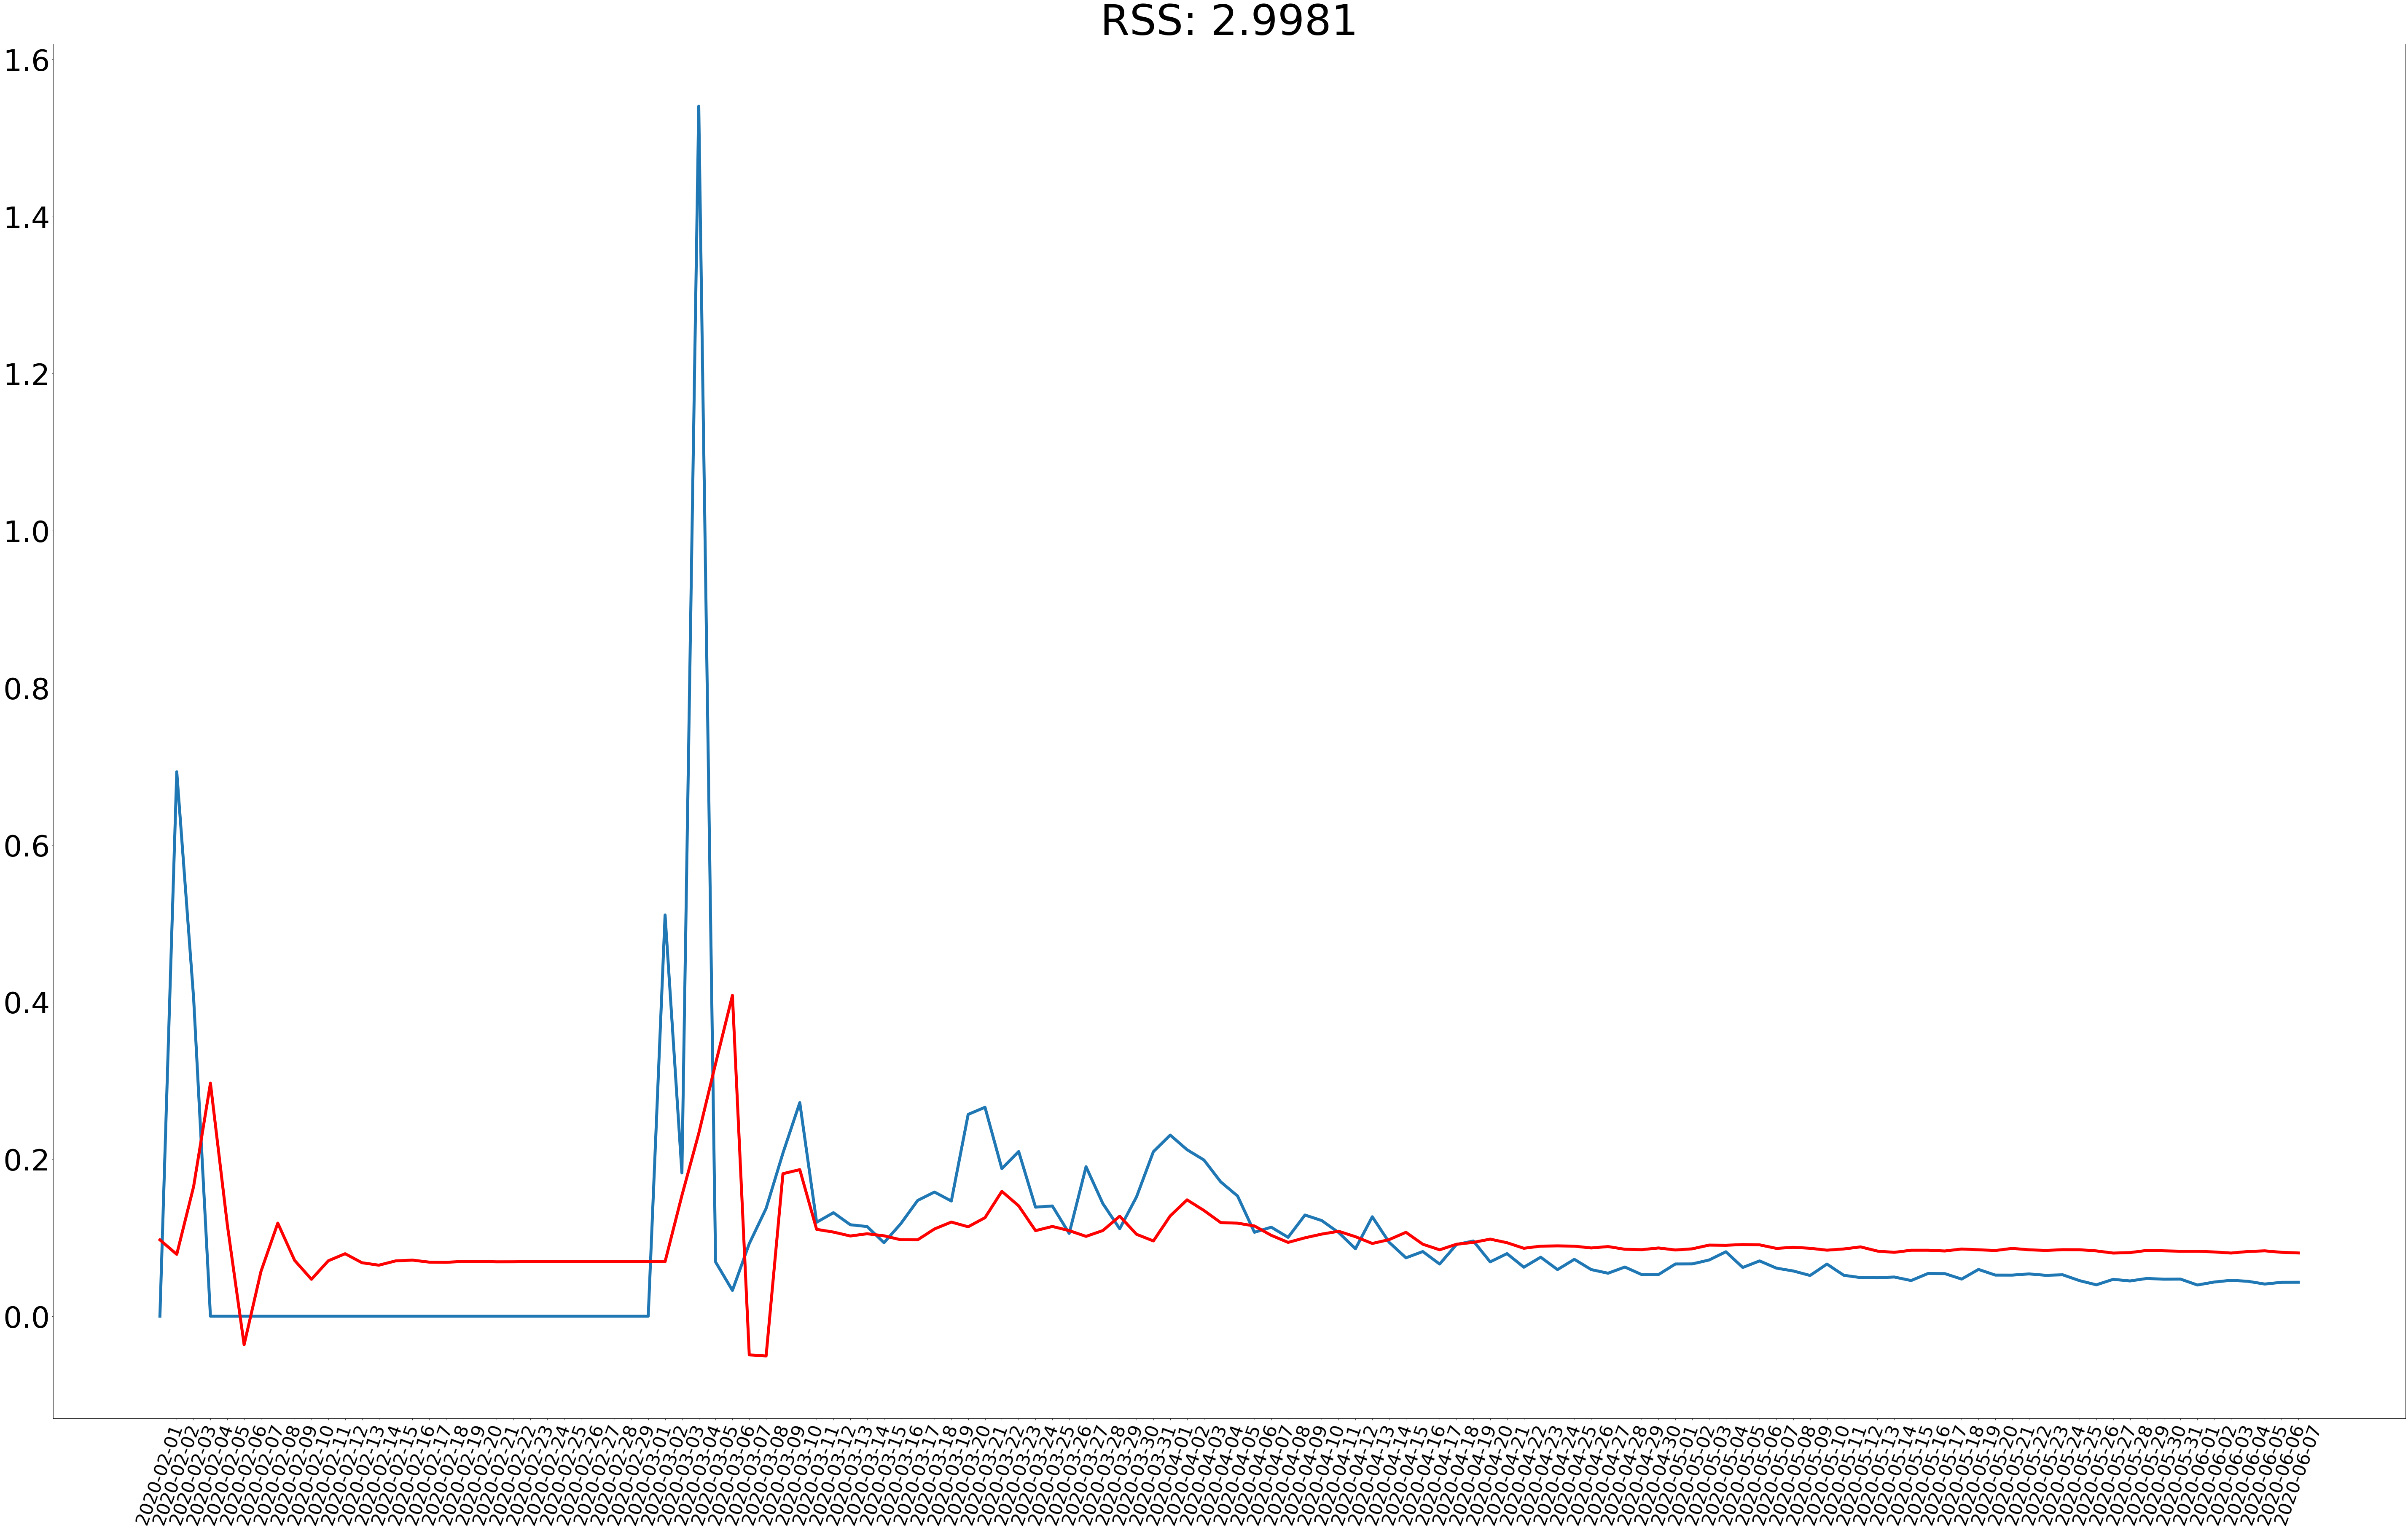

In [21]:
from statsmodels.tsa.arima_model import ARIMA
#AR is coreln btwn previous time period to current
#AR Model
model = ARIMA(indexedDataset_logscale, order=(2,1,2))

results_AR = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting,linewidth=7)
plt.plot(results_AR.fittedvalues, color='red',linewidth=7)
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogdiffshifting['totalconfirmed'])**2), fontsize=100)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)
print('Plotting AR Model')

/home/vineeth/anaconda3/envs/MBA/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/vineeth/anaconda3/envs/MBA/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting MA Model


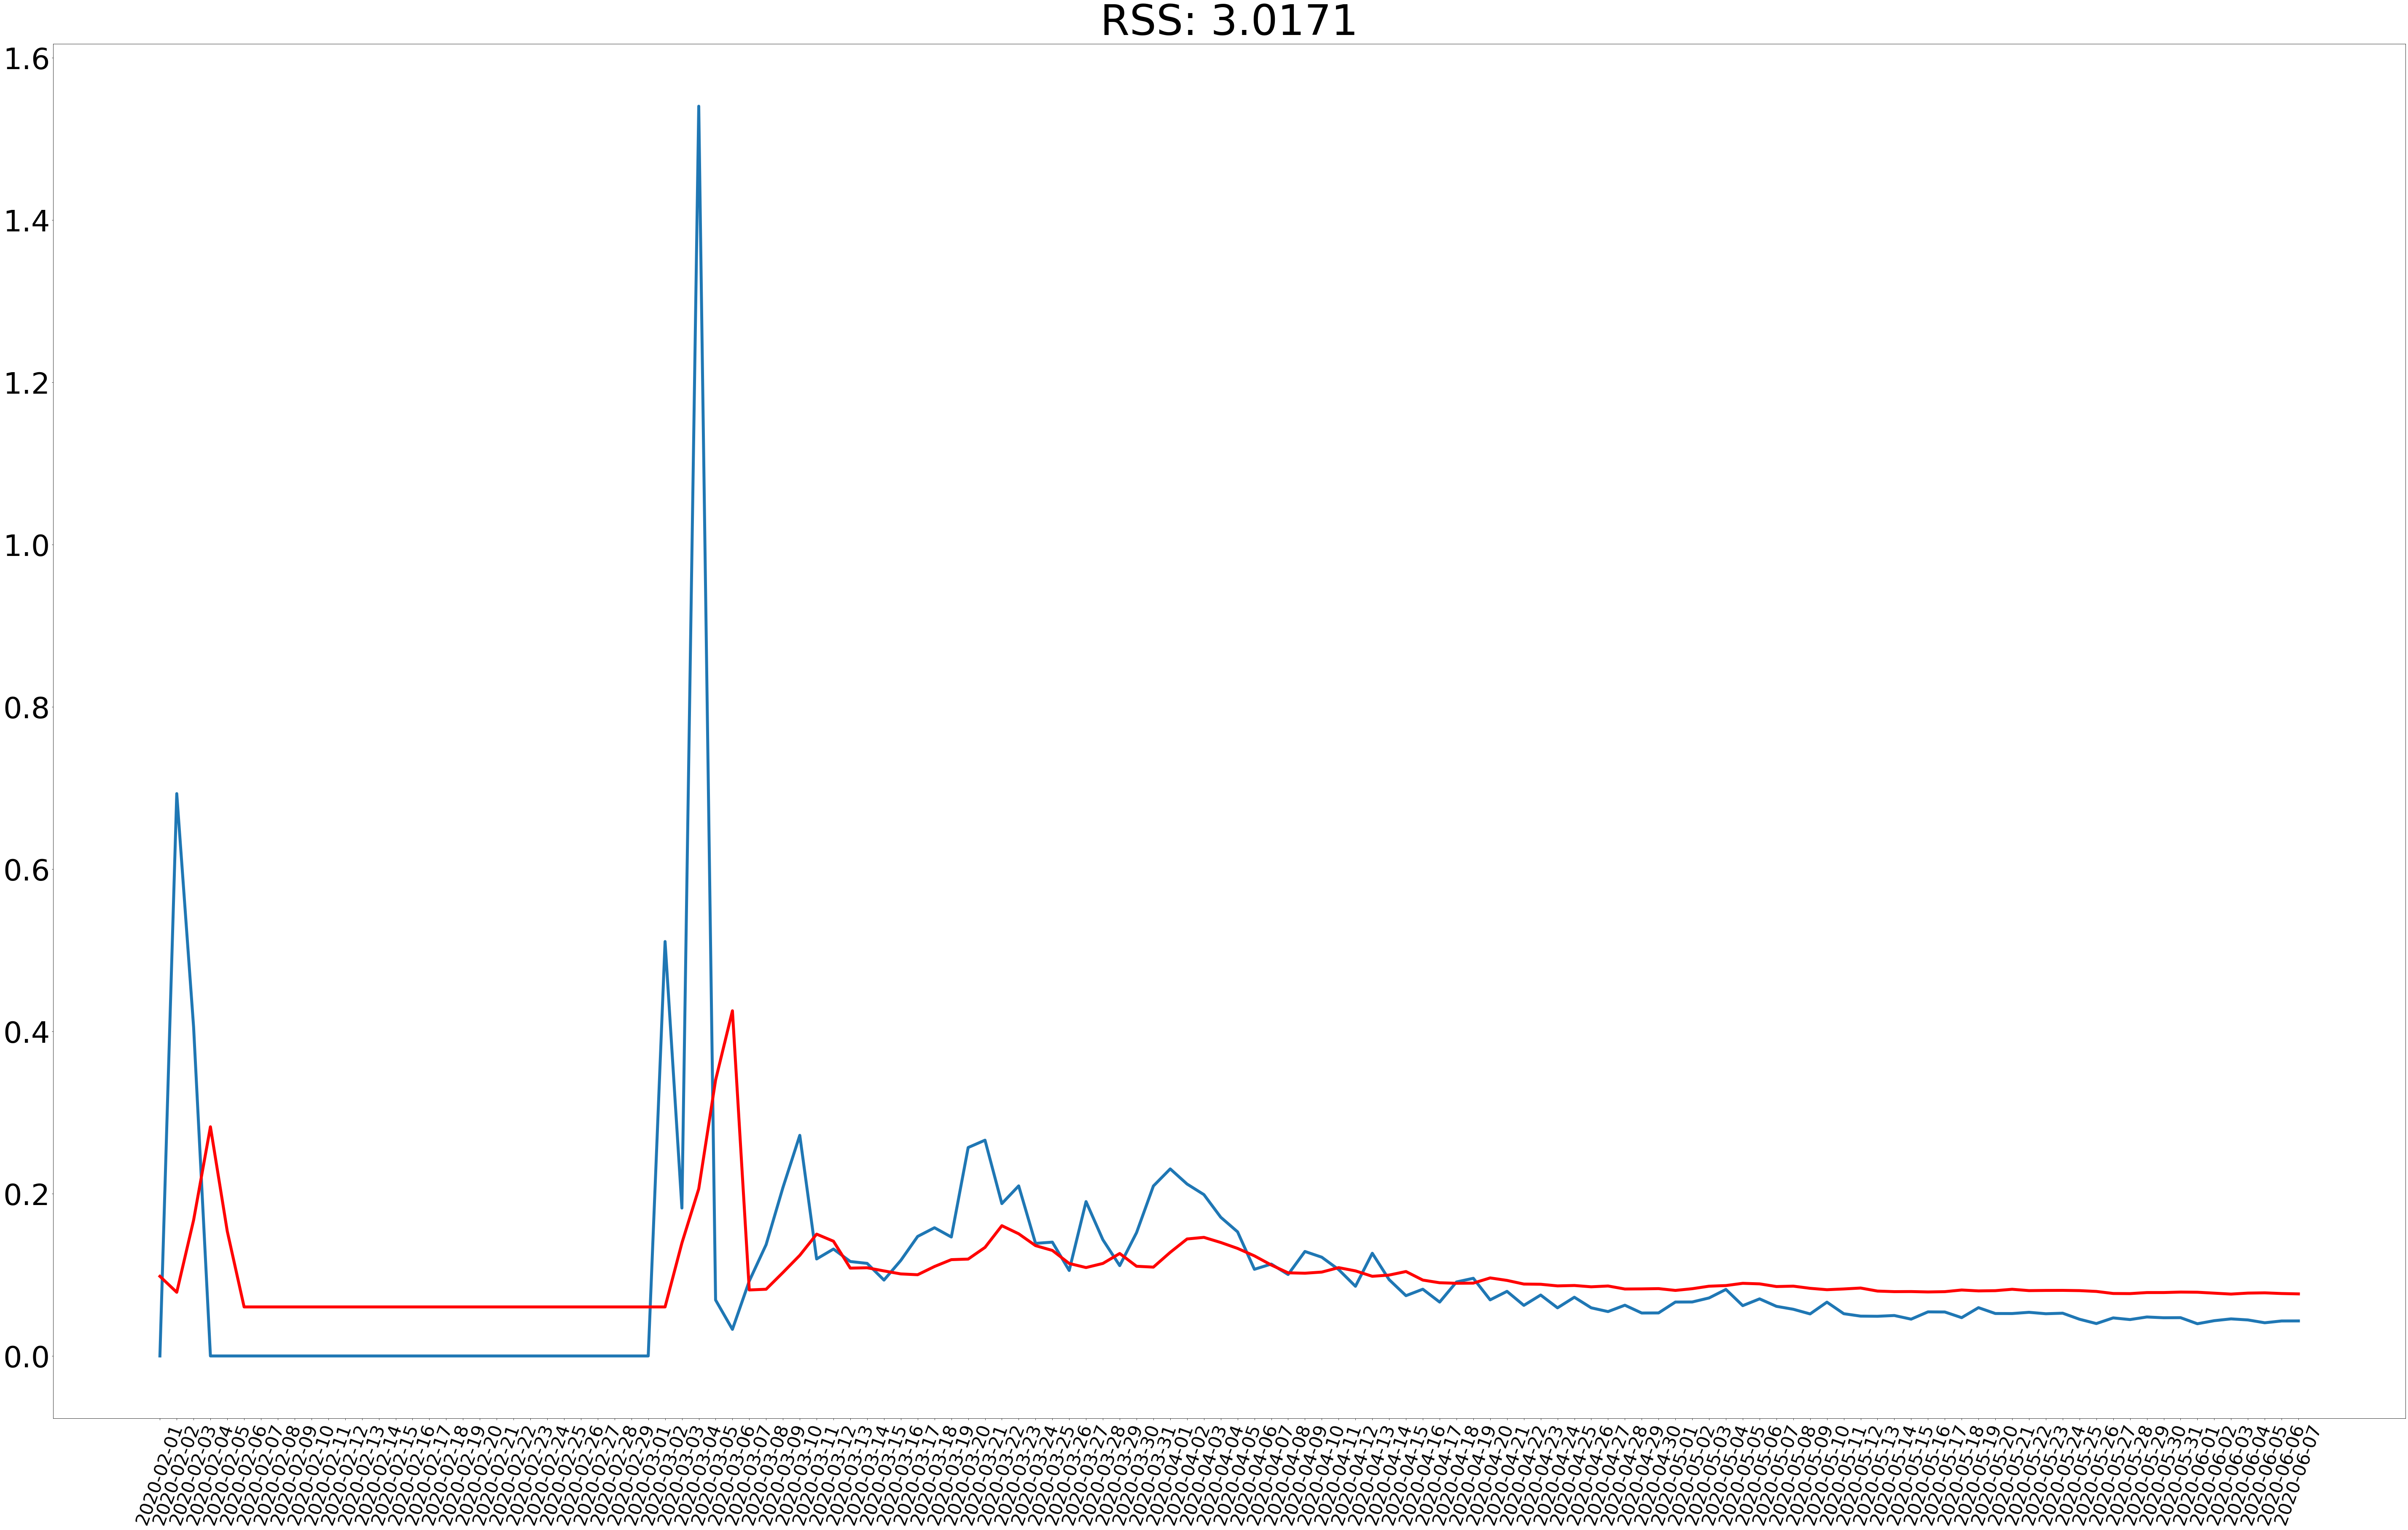

In [22]:
#there is always some noise and we need to find out the avg of that noise
#when we try to avg, the crust and trough present smoothen out and we have avg of it
#MA Model
model = ARIMA(indexedDataset_logscale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting,linewidth=7)
plt.plot(results_MA.fittedvalues, color='red',linewidth=7)
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogdiffshifting['totalconfirmed'])**2), fontsize=100)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)
print('Plotting MA Model')

/home/vineeth/anaconda3/envs/MBA/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/vineeth/anaconda3/envs/MBA/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8]),
 <a list of 11 Text yticklabel objects>)

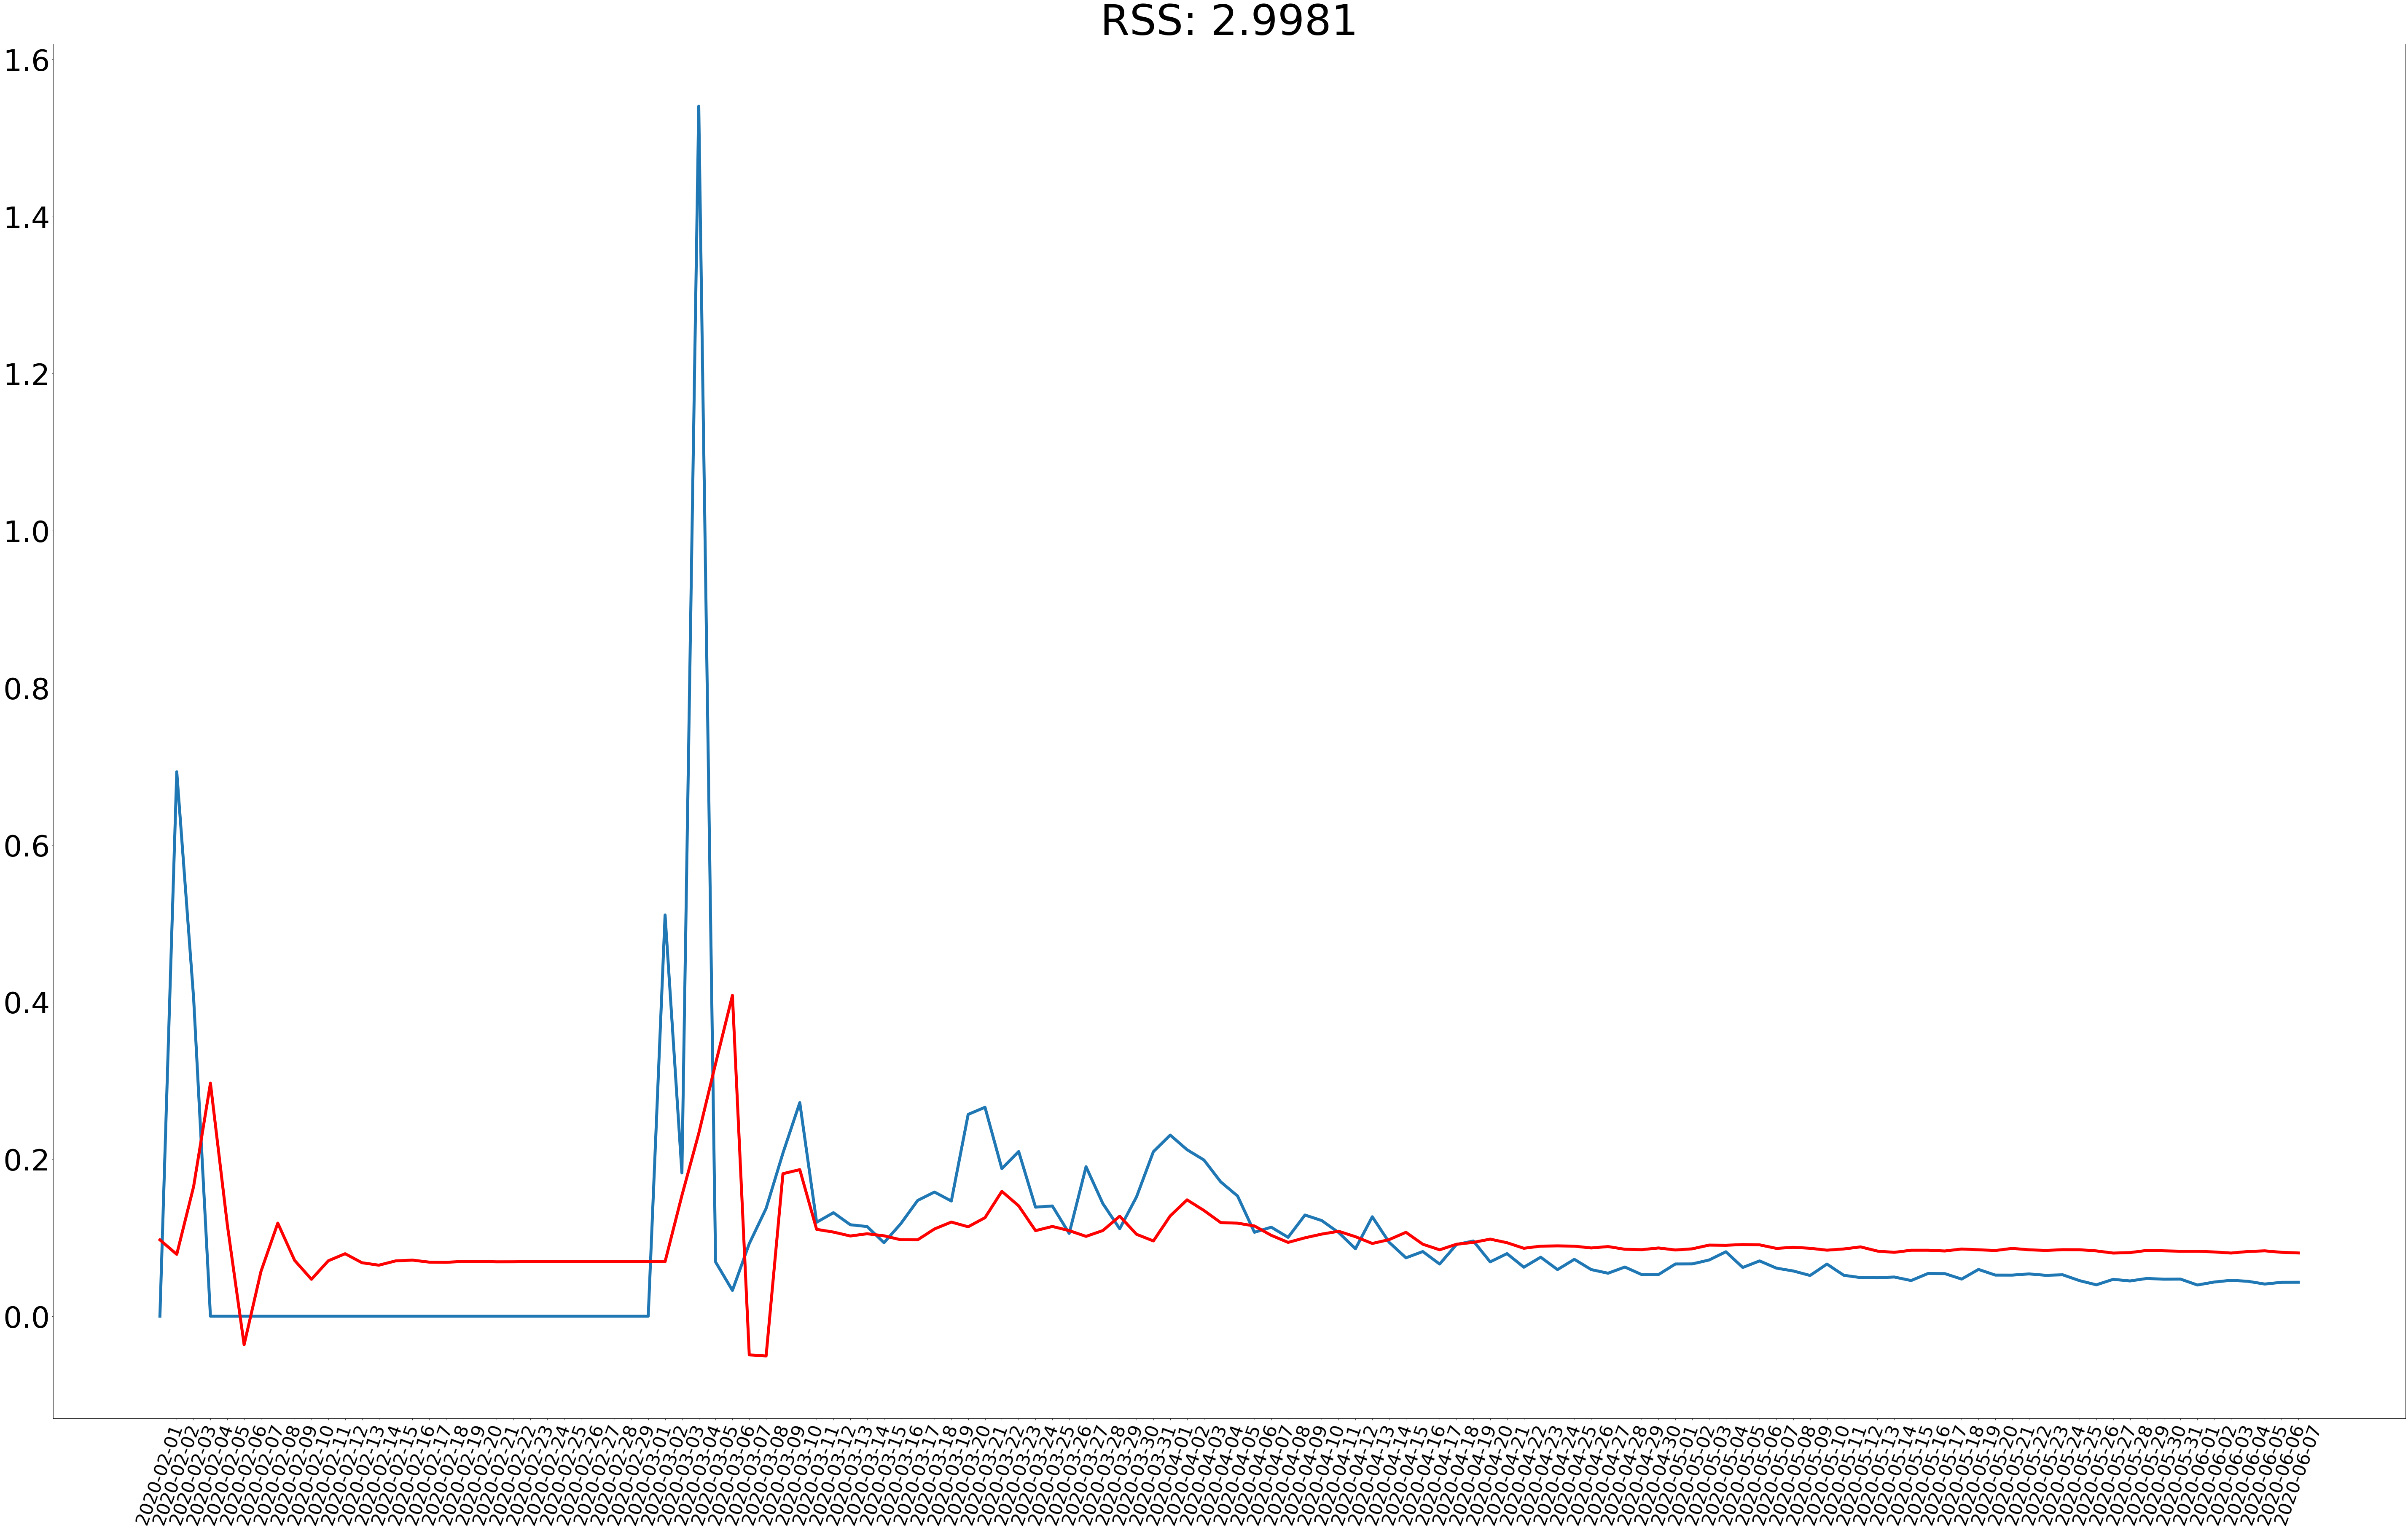

In [23]:
model = ARIMA(indexedDataset_logscale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting,linewidth=7)
plt.plot(results_ARIMA.fittedvalues, color='red',linewidth=7)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogdiffshifting['totalconfirmed'])**2), fontsize=100)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)

In [24]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2020-02-01    0.097172
2020-02-02    0.078738
2020-02-03    0.164902
2020-02-04    0.296666
2020-02-05    0.116873
dtype: float64


In [25]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2020-02-01    0.097172
2020-02-02    0.175910
2020-02-03    0.340812
2020-02-04    0.637478
2020-02-05    0.754351
dtype: float64


In [26]:
#predictions_ARIMA_log = pd.Series(indexedDataset_logscale['Passengers'].ix[0], indexedDataset_logscale.index)
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['totalconfirmed'].iloc[0], indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2020-01-31    0.000000
2020-02-01    0.097172
2020-02-02    0.175910
2020-02-03    0.340812
2020-02-04    0.637478
dtype: float64

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text yticklabel objects>)

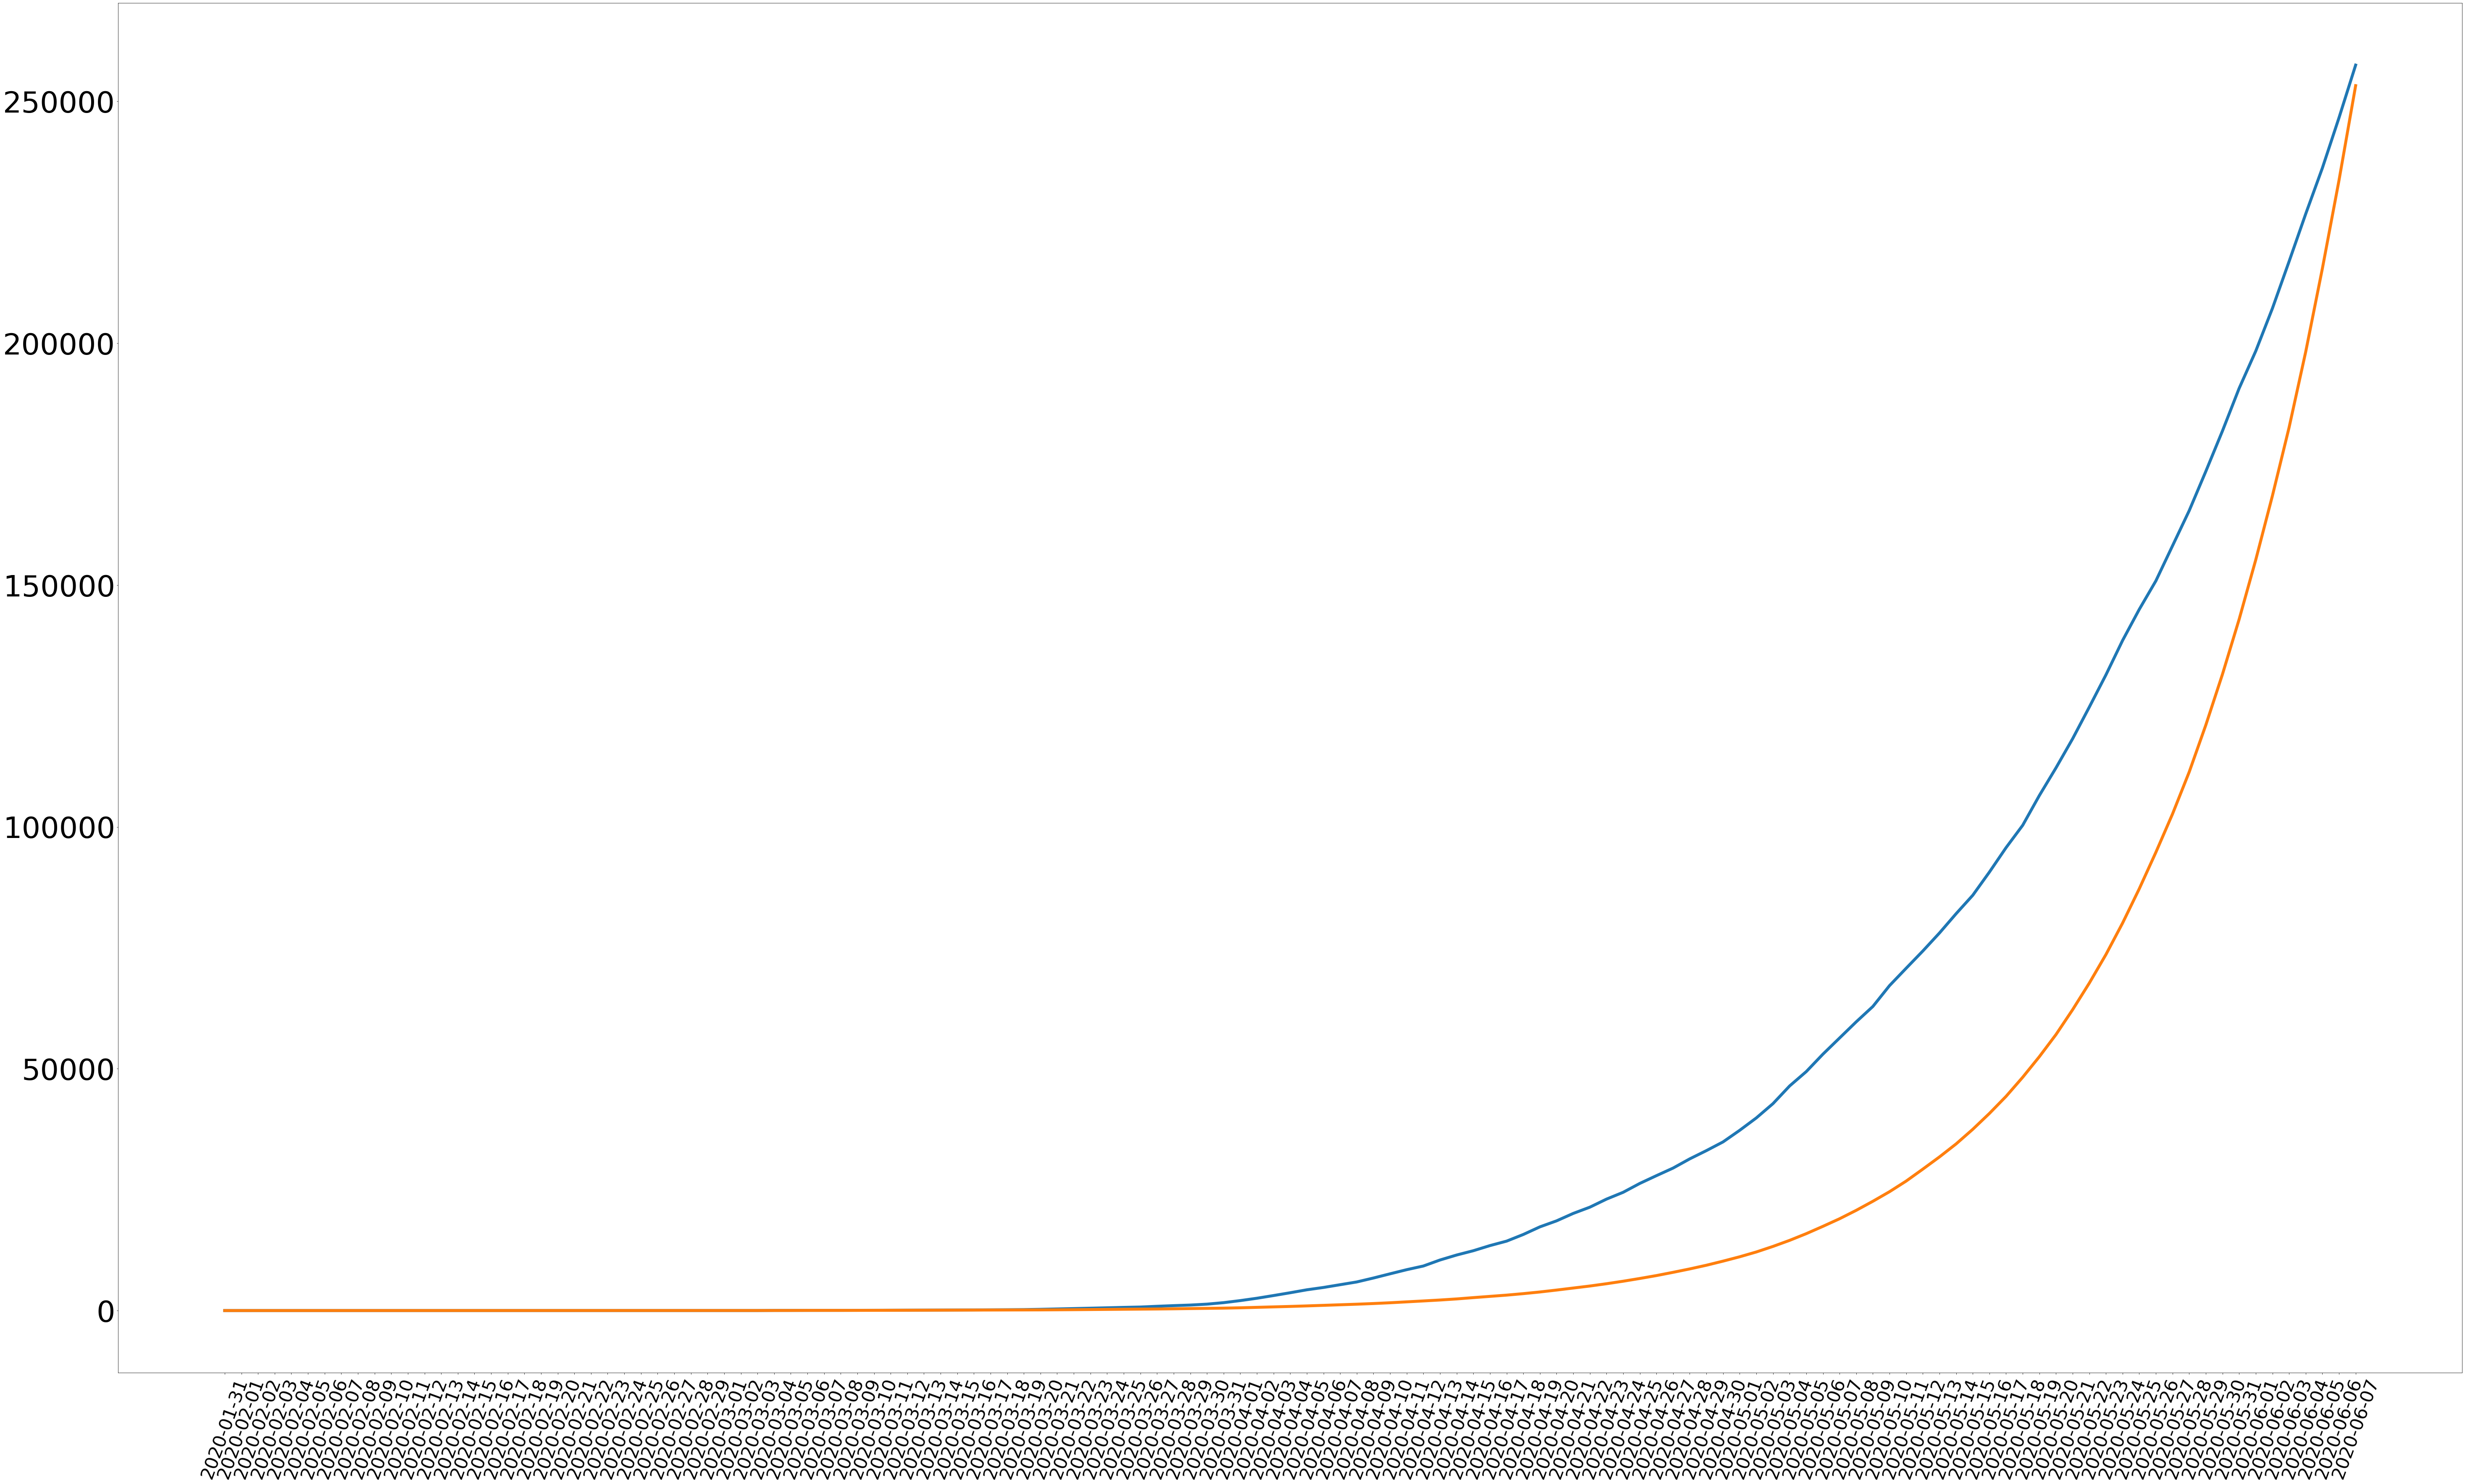

In [27]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset,linewidth=7)
plt.plot(predictions_ARIMA,linewidth=7)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)

In [28]:
indexedDataset_logscale

totalconfirmed
date                      
2020-01-31        0.000000
2020-02-01        0.000000
2020-02-02        0.693147
2020-02-03        1.098612
2020-02-04        1.098612
...                    ...
2020-06-03       12.287081
2020-06-04       12.331484
2020-06-05       12.372413
2020-06-06       12.415535
2020-06-07       12.458721

[129 rows x 1 columns]

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text yticklabel objects>)

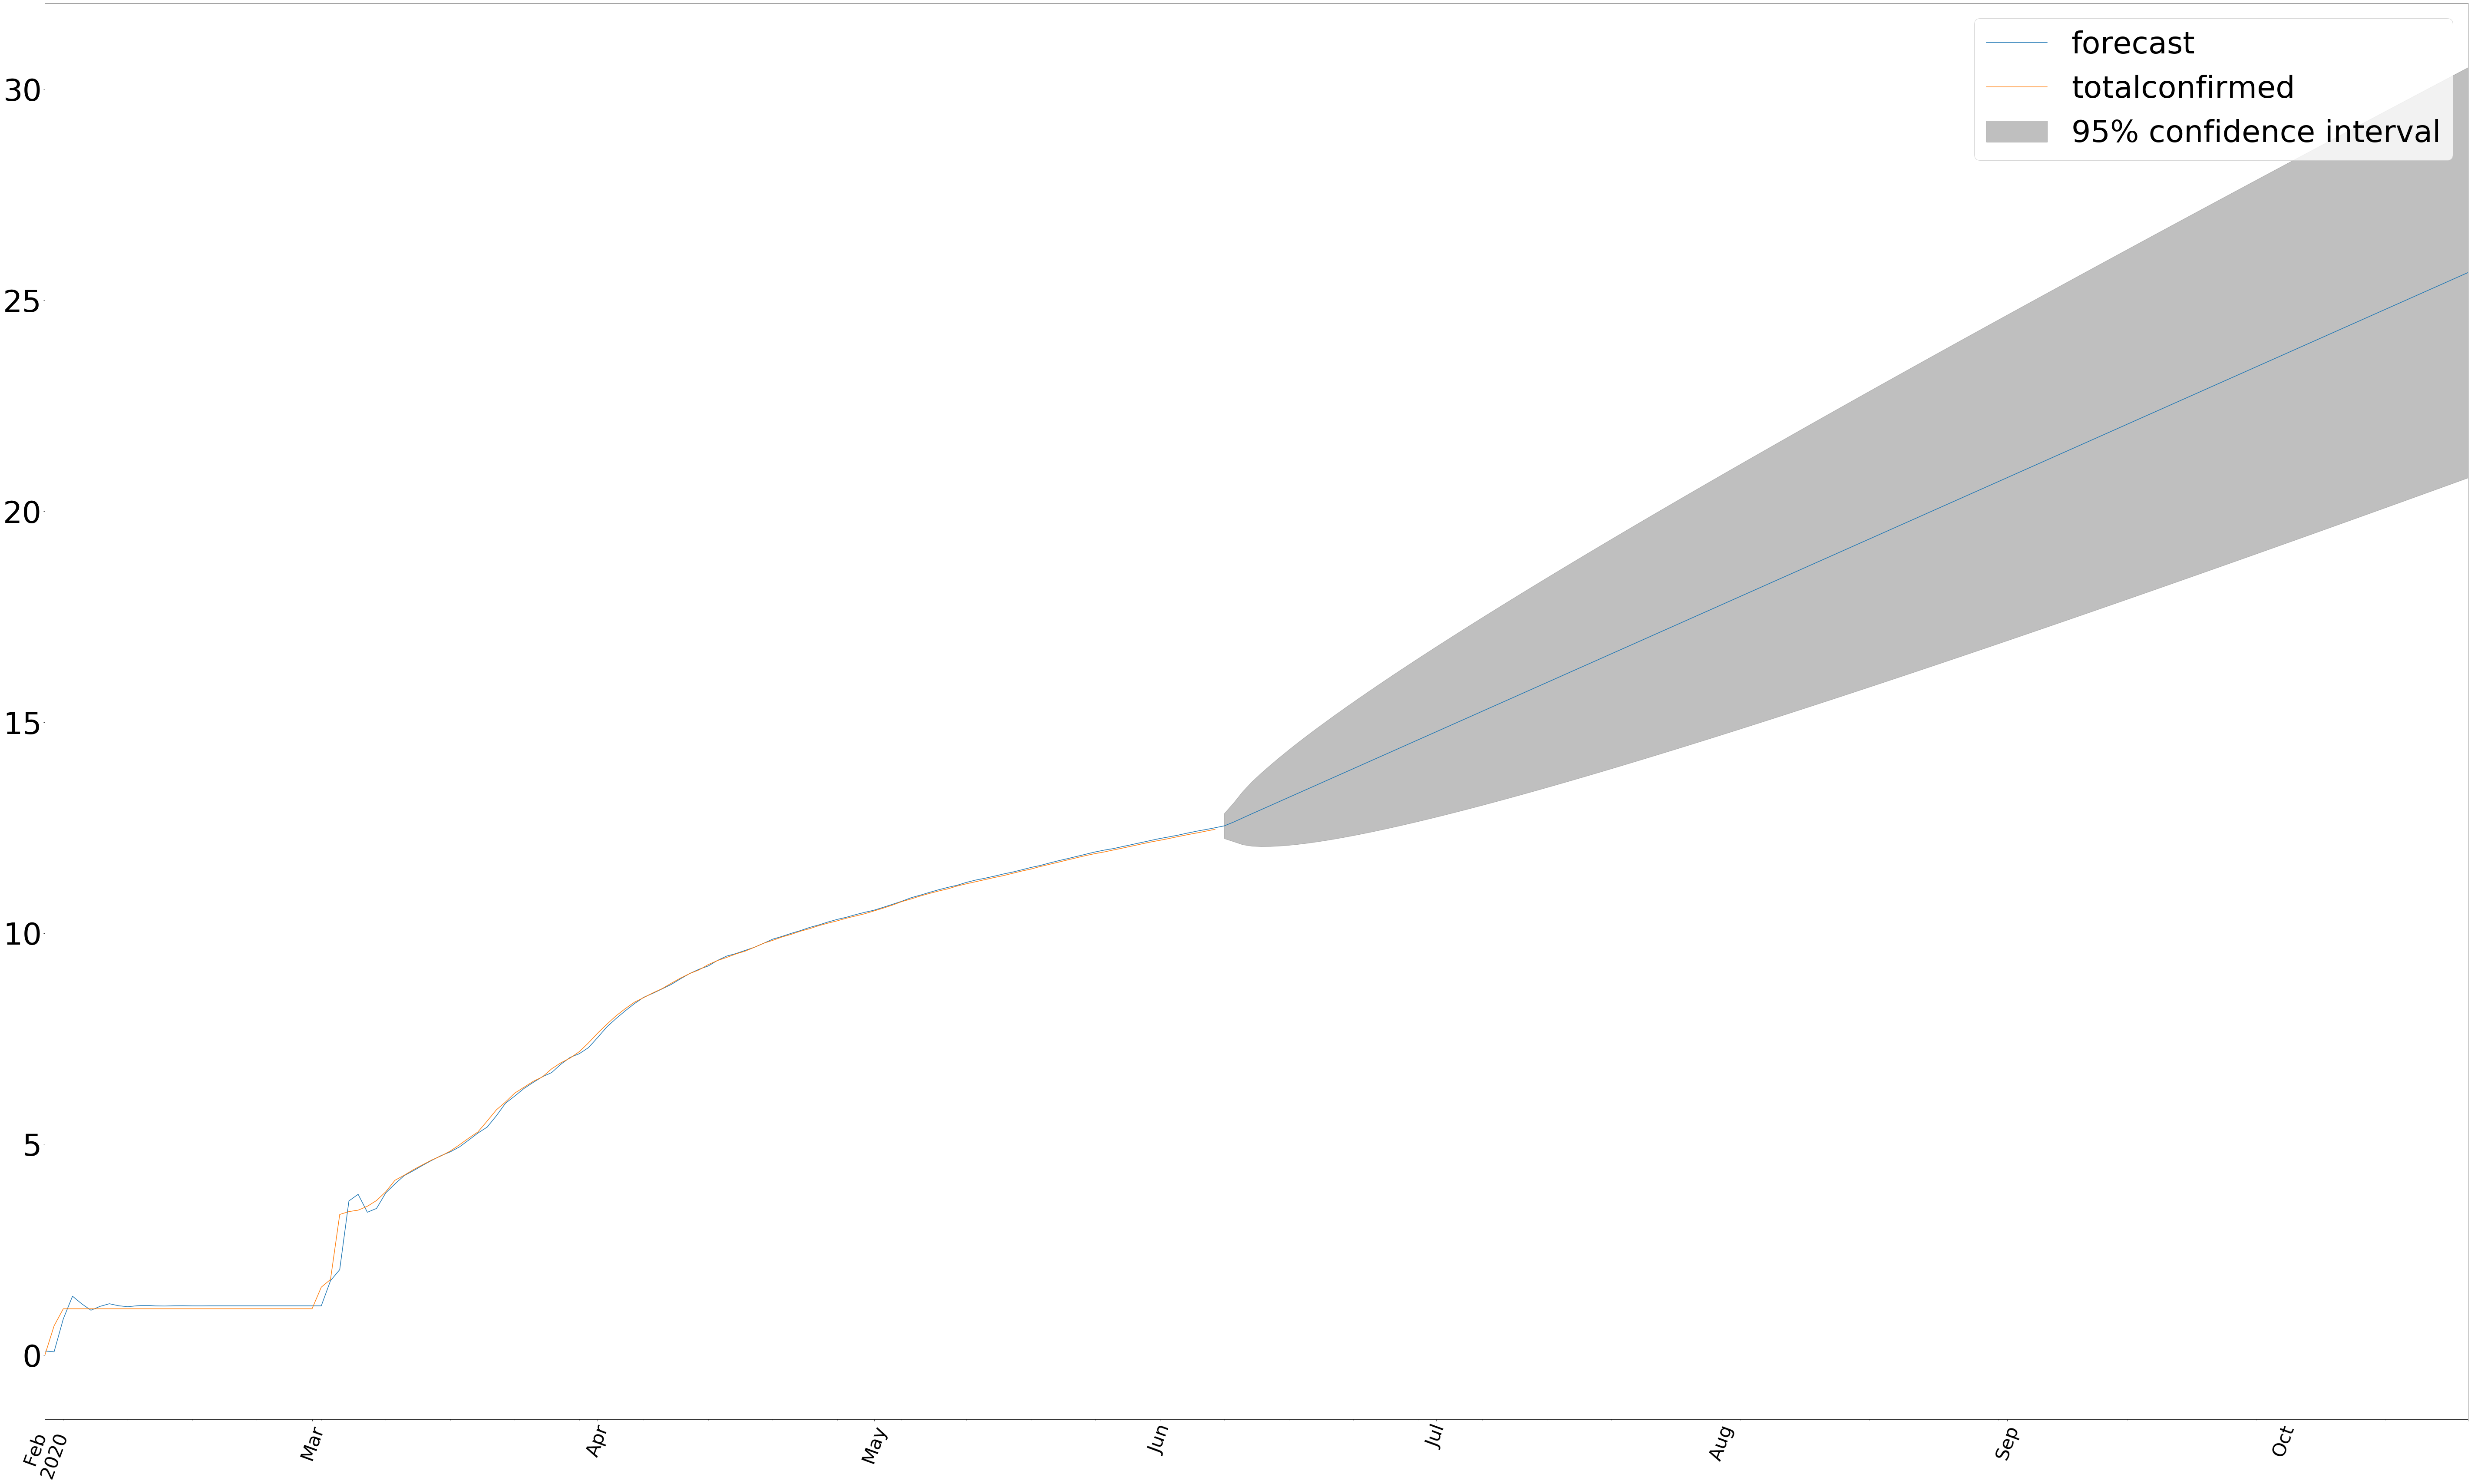

In [29]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)
plt.legend(fontsize=70)
plt.xticks(fontsize='x-large',rotation=70)
plt.yticks(fontsize=70)


In [30]:
x[1]

array([0.15229966, 0.23382587, 0.32193738, 0.39011556, 0.44416402,
       0.49210828, 0.53633464, 0.57725604, 0.61538074, 0.65125939,
       0.68527393, 0.71768204, 0.74868697, 0.77845722, 0.80713038,
       0.83481945, 0.86161913, 0.88760999, 0.91286114, 0.93743237,
       0.9613758 , 0.98473722, 1.00755713, 1.02987153, 1.05171257,
       1.07310918, 1.09408743, 1.11467093, 1.13488116, 1.15473773,
       1.17425858, 1.19346017, 1.21235769, 1.23096513, 1.24929545,
       1.26736068, 1.285172  , 1.30273983, 1.32007388, 1.33718324,
       1.35407644, 1.37076146, 1.38724582, 1.40353658, 1.41964042,
       1.43556361, 1.45131212, 1.46689156, 1.48230726, 1.49756429,
       1.51266744, 1.52762128, 1.54243014, 1.55709817, 1.57162931,
       1.58602732, 1.6002958 , 1.61443818, 1.62845774, 1.64235763,
       1.65614087, 1.66981033, 1.6833688 , 1.69681894, 1.71016329,
       1.72340432, 1.7365444 , 1.74958578, 1.76253068, 1.77538119,
       1.78813936, 1.80080713, 1.81338642, 1.82587905, 1.83828

In [31]:
len(x[1])

120

In [32]:
np.exp(x[1])

array([ 1.16450914,  1.26342447,  1.37979837,  1.47715148,  1.5591862 ,
        1.63576124,  1.70972859,  1.78114432,  1.85036097,  1.91795476,
        1.98431533,  2.04967662,  2.11422215,  2.17810932,  2.24146659,
        2.30439795,  2.36699006,  2.42931661,  2.49144071,  2.55341676,
        2.61529211,  2.67710831,  2.73890207,  2.80070599,  2.86254925,
        2.92445805,  2.98645608,  3.04856481,  3.11080384,  3.17319108,
        3.235743  ,  3.29847478,  3.36140045,  3.42453305,  3.48788471,
        3.55146674,  3.61528975,  3.67936369,  3.74369794,  3.80830131,
        3.87318217,  3.93834844,  4.00380763,  4.0695669 ,  4.13563306,
        4.20201265,  4.2687119 ,  4.33573679,  4.40309307,  4.47078626,
        4.53882169,  4.60720451,  4.67593967,  4.74503198,  4.81448611,
        4.88430657,  4.95449776,  5.02506394,  5.09600928,  5.16733784,
        5.23905357,  5.31116035,  5.38366195,  5.45656209,  5.52986438,
        5.6035724 ,  5.67768964,  5.75221953,  5.82716544,  5.90